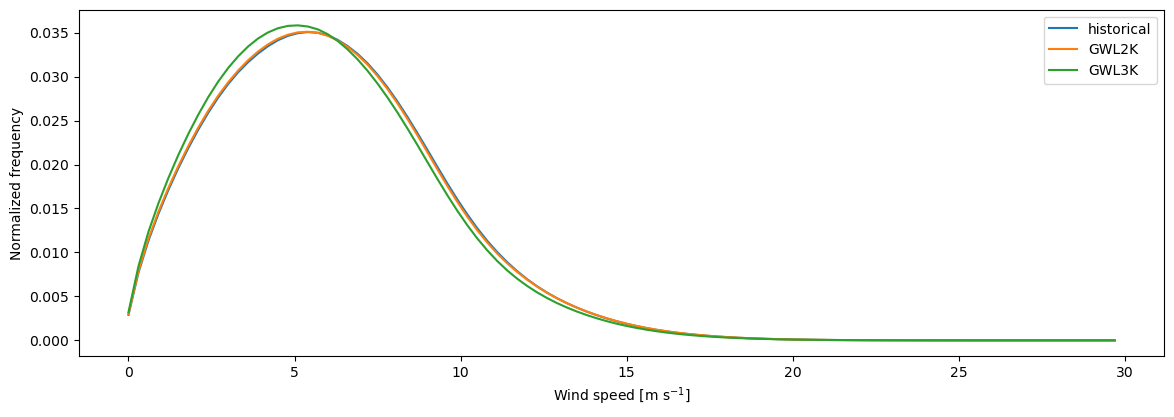

In [1]:
# sfcWind speed histogram
import json

import matplotlib.pyplot as plt
import numpy as np

region = "Germany"
with open(f"sfcWind/{region}.json", "r", encoding="utf-8") as file:
    wind_stats = json.load(file)
    dataset = "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_sfcWind"
    Hereon_data = wind_stats[dataset]
    edges = wind_stats["edges"]
    wind_hist = Hereon_data["historical"]
    wind_2K = Hereon_data["ssp370-GWL2K"]
    wind_3K = Hereon_data["ssp370-GWL3K"]

    season = "Year"
    max_count = max(
        wind_hist[season]["counts"]
        + wind_2K[season]["counts"]
        + wind_3K[season]["counts"]
    )
    plt.figure(figsize=(14, 4.5))
    labels = ["historical", "GWL2K", "GWL3K"]
    for index, data in enumerate([wind_hist, wind_2K, wind_3K]):
        plt.plot(
            edges[:-1],
            np.array(data[season]["counts"]) / np.sum(data[season]["counts"]),
            label=labels[index],
        )

    plt.ylabel("Normalized frequency")
    plt.xlabel("Wind speed [m s$^{-1}$]")
    plt.legend()
    plt.savefig(
        "Publikation/Figures/Wind_histogram.pdf",
        bbox_inches="tight",
        format="pdf",
        dpi=300,
    )
    plt.show()

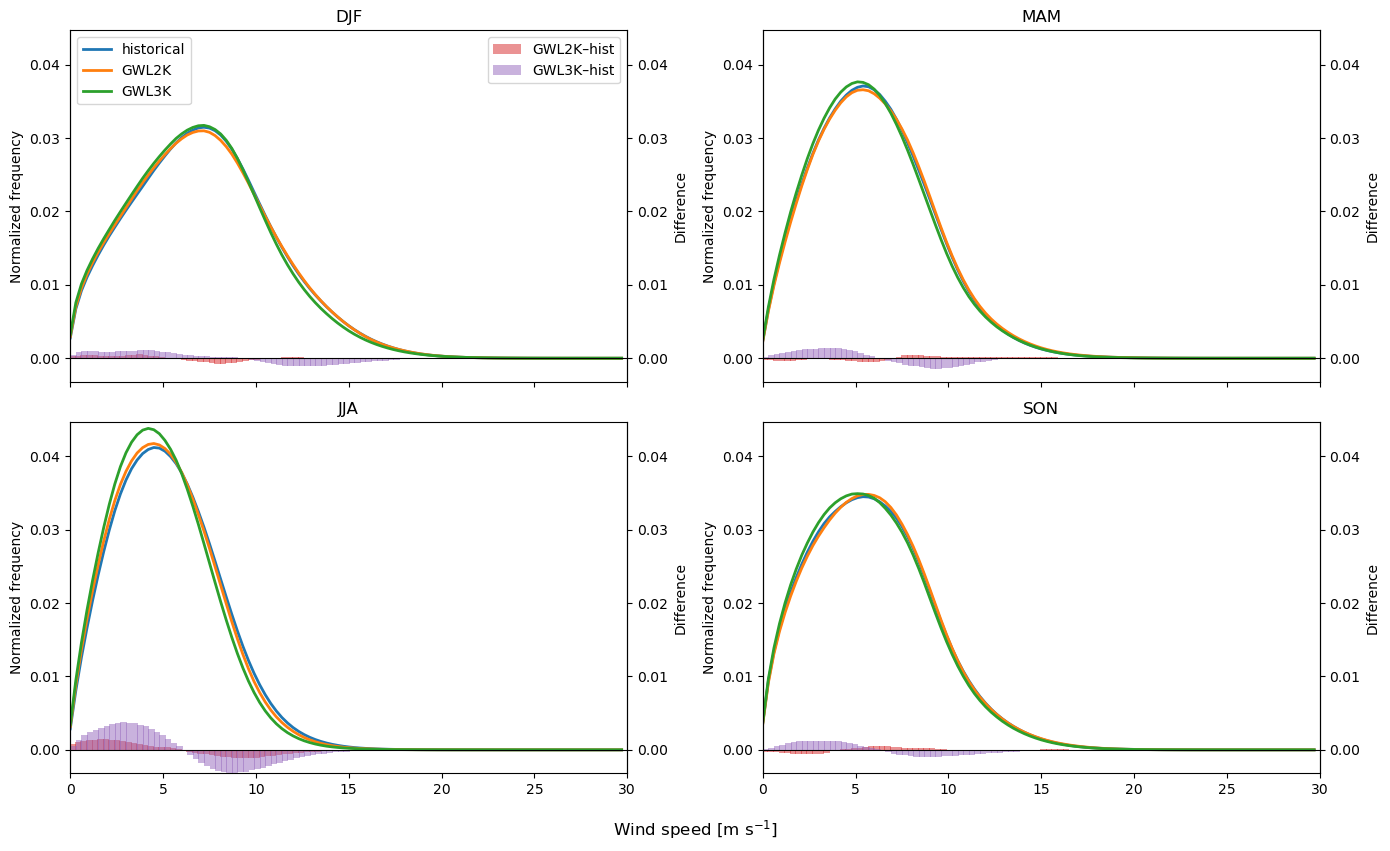

In [2]:
# sfcWind_daily_cycle_all_seasons
import json

import matplotlib.pyplot as plt
import numpy as np

region = "Germany"
dataset = "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_sfcWind"
seasons = ["DJF", "MAM", "JJA", "SON"]

# Pre-load to compute global limits
all_hist, all_diff2, all_diff3 = [], [], []
for season in seasons:
    with open(f"sfcWind/{region}.json") as f:
        json_data = json.load(f)
        d = json_data[dataset]
        edges = json_data["edges"]
        hist = np.array(
            d["historical"][season]["counts"]
            / np.sum(d["historical"][season]["counts"])
        )
        gwl2 = np.array(
            d["ssp370-GWL2K"][season]["counts"]
            / np.sum(d["ssp370-GWL2K"][season]["counts"])
        )
        gwl3 = np.array(
            d["ssp370-GWL3K"][season]["counts"]
            / np.sum(d["ssp370-GWL3K"][season]["counts"])
        )
    all_hist.append((hist, gwl2, gwl3))
    all_diff2.append(gwl2 - hist)
    all_diff3.append(gwl3 - hist)

# Compute y-limits
hists = np.concatenate([np.concatenate(x) for x in all_hist])
diffs2 = np.concatenate(all_diff2)
diffs3 = np.concatenate(all_diff3)
rad_min, rad_max = 0, hists.max() * 1.02
diff_min, diff_max = (
    min(diffs2.min(), diffs3.min()) * 1.02,
    max(diffs2.max(), diffs3.max()) * 1.02,
)

# Setup 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=True)
axes = axes.ravel()
hours = np.array(edges[:-1])

for i, (ax, (hist, gwl2, gwl3), diff2, diff3, season) in enumerate(
    zip(axes, all_hist, all_diff2, all_diff3, seasons)
):
    # Plot lines
    ax.plot(hours, hist, color="tab:blue", lw=2, label="historical")
    ax.plot(hours, gwl2, color="tab:orange", lw=2, label="GWL2K")
    ax.plot(hours, gwl3, color="tab:green", lw=2, label="GWL3K")
    ax.set_ylim(diff_min, rad_max)
    ax.set_xlim(0, 30)
    ax.set_title(season)
    ax.set_ylabel("Normalized frequency")

    # Twin for bars
    ax2 = ax.twinx()
    bw = 0.35
    ax2.bar(
        hours - bw / 2, diff2, width=bw, alpha=0.5, color="tab:red", label="GWL2K–hist"
    )
    ax2.bar(
        hours + bw / 2,
        diff3,
        width=bw,
        alpha=0.5,
        color="tab:purple",
        label="GWL3K–hist",
    )
    ax2.spines["bottom"].set_position(("data", 0))
    ax2.spines["top"].set_visible(False)
    ax2.set_ylim(diff_min, rad_max)
    ax2.set_ylabel("Difference")

    # Only on the first subplot do we add both legends
    if i == 0:
        ax.legend(loc="upper left")
        ax2.legend(loc="upper right")

# Global labels/title
fig.supxlabel("Wind speed [m s$^{-1}$]")
# fig.suptitle(f"{region} — {dataset}", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Save & show
fig.savefig(
    "Publikation/Figures/sfcWind_histogram_all_seasons_shared_axes.pdf", dpi=300
)
plt.show()


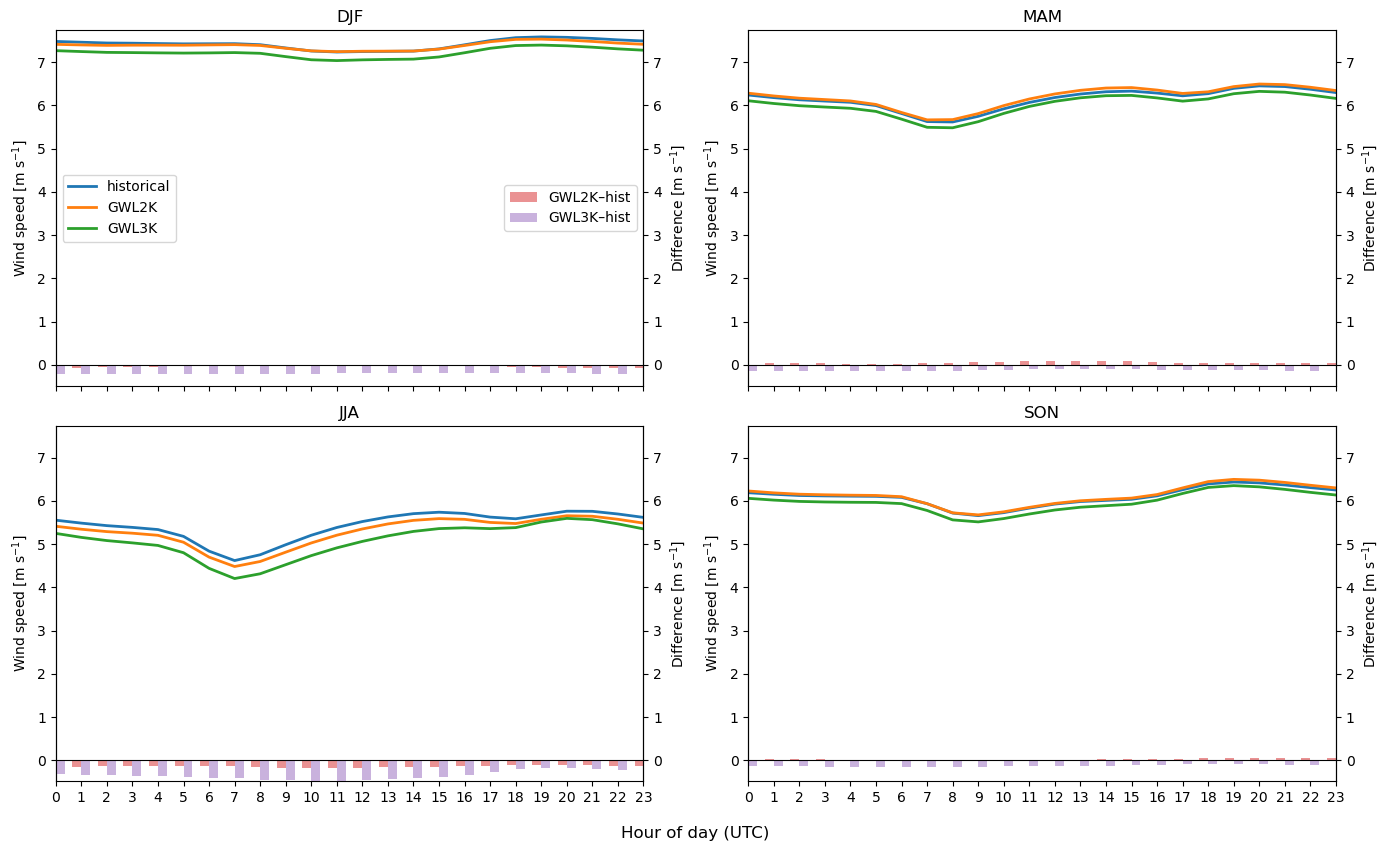

In [3]:
# Wind_daily_cycle_all_seasons
import json

import matplotlib.pyplot as plt
import numpy as np

region = "Germany"
dataset = "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_sfcWind"
seasons = ["DJF", "MAM", "JJA", "SON"]

# Pre-load to compute global limits
all_hist, all_diff2, all_diff3 = [], [], []
for season in seasons:
    with open(f"sfcWind/{region}.json") as f:
        d = json.load(f)[dataset]
        hist = np.array(d["historical"][season]["diurnal_cycle"])
        gwl2 = np.array(d["ssp370-GWL2K"][season]["diurnal_cycle"])
        gwl3 = np.array(d["ssp370-GWL3K"][season]["diurnal_cycle"])
    all_hist.append((hist, gwl2, gwl3))
    all_diff2.append(gwl2 - hist)
    all_diff3.append(gwl3 - hist)

# Compute y-limits
hists = np.concatenate([np.concatenate(x) for x in all_hist])
diffs2 = np.concatenate(all_diff2)
diffs3 = np.concatenate(all_diff3)
rad_min, rad_max = 0, hists.max() * 1.02
diff_min, diff_max = (
    min(diffs2.min(), diffs3.min()) * 1.02,
    max(diffs2.max(), diffs3.max()) * 1.02,
)

# Setup 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=True)
axes = axes.ravel()
hours = np.arange(len(all_hist[0][0]))

for i, (ax, (hist, gwl2, gwl3), diff2, diff3, season) in enumerate(
    zip(axes, all_hist, all_diff2, all_diff3, seasons)
):
    # Plot lines
    ax.plot(hours, hist, color="tab:blue", lw=2, label="historical")
    ax.plot(hours, gwl2, color="tab:orange", lw=2, label="GWL2K")
    ax.plot(hours, gwl3, color="tab:green", lw=2, label="GWL3K")
    ax.set_ylim(diff_min, rad_max)
    ax.set_xlim(0, 23)
    ax.set_title(season)
    ax.set_xticks(hours)
    ax.set_ylabel("Wind speed [m s$^{-1}$]")

    # Twin for bars
    ax2 = ax.twinx()
    bw = 0.35
    ax2.bar(
        hours - bw / 2, diff2, width=bw, alpha=0.5, color="tab:red", label="GWL2K–hist"
    )
    ax2.bar(
        hours + bw / 2,
        diff3,
        width=bw,
        alpha=0.5,
        color="tab:purple",
        label="GWL3K–hist",
    )
    ax2.spines["bottom"].set_position(("data", 0))
    ax2.spines["top"].set_visible(False)
    ax2.set_ylim(diff_min, rad_max)
    ax2.set_ylabel("Difference [m s$^{-1}$]")

    # Only on the first subplot do we add both legends
    if i == 0:
        ax.legend(loc="center left")
        ax2.legend(loc="center right")

# Global labels/title
fig.supxlabel("Hour of day (UTC)")
# fig.suptitle(f"{region} — {dataset}", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig(
    "Publikation/Figures/Wind_daily_cycle.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)

plt.show()


In [4]:
#!/usr/bin/env python3
# Generates the requested LaTeX table from the JSON input structure.
import json
from collections import OrderedDict
from pathlib import Path

INPUT = Path("sfcWind/Germany.json")
OUT = Path("Publikation/Tables/Wind_table.tex")
SEASON = "Year"

REPLACEMENTS = {
    "EC-Earth-Consortium-EC-Earth3-Veg": "EC-Earth",
    "MIROC-MIROC6": "MIROC",
    "MPI-M-MPI-ESM1-2-HR": "MPI-ESM",
    "CLMcom-BTU-ICON-2-6-5-rc": "ICON",
    "CLMcom-KIT-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm3": "CCLM",
}


def latex_escape(s: str) -> str:
    return s.replace("_", r"\_")


def replace_label(s: str) -> str:
    for a, b in REPLACEMENTS.items():
        s = s.replace(a, b)
    return s


def load_data(path: Path) -> dict:
    with path.open(encoding="utf-8") as fh:
        return json.load(fh)


def build_grouped(data: dict) -> OrderedDict:
    grouped = OrderedDict()
    for ds_name, ds in data.items():
        if ds_name == "edges":
            continue
        parts = ds_name.split("_")
        if len(parts) < 3:
            continue
        res, gcm, rcm = parts[0], parts[1], parts[2]
        # normalize known variant
        if rcm == "CLMcom-Hereon-CCLM-6-0-clm3":
            rcm = "CLMcom-Hereon-CCLM-6-0-clm2"
        for scen, stats in ds.items():
            season_stats = stats.get(SEASON, {})
            mean_val = season_stats.get("mean")
            if mean_val is None:
                continue
            u_c3M = season_stats.get("under_cut_in_3MW")
            u_c5M = season_stats.get("under_cut_in_5MW")
            nom3M = season_stats.get("nominal_3MW")
            nom5M = season_stats.get("nominal_5MW")
            grouped.setdefault(res, OrderedDict())
            grouped[res].setdefault(gcm, OrderedDict())
            grouped[res][gcm].setdefault(rcm, OrderedDict())
            grouped[res][gcm][rcm][scen] = {
                "wind": f"{round(mean_val, 1):.1f}",
                "uci_3.3": f"{round(u_c3M * 100, 1):.1f}" if u_c3M is not None else "",
                "uci_5": f"{round(u_c5M * 100, 1):.1f}" if u_c5M is not None else "",
                "rp_3.3": f"{round(nom3M * 100, 1):.1f}" if nom3M is not None else "",
                "rp_5": f"{round(nom5M * 100, 1):.1f}" if nom5M is not None else "",
            }
    return grouped


def make_order(grouped: OrderedDict, left: str, right: str) -> list:
    order = []
    if left in grouped:
        order.extend(grouped[left].keys())
    if right in grouped:
        for g in grouped[right].keys():
            if g not in order:
                order.append(g)
    return order


def write_table(grouped: OrderedDict, out: Path):
    RES_LEFT = "CEU-3"
    RES_RIGHT = "EUR-11"

    gcm_order = make_order(grouped, RES_LEFT, RES_RIGHT)

    lines = [
        r"\begin{table}[!htbp]",
        r"\centering",
        r"\caption{Mean wind speed and turbine performance metrics grouped by spatial resolution, global climate model (GCM), regional climate model (RCM), and emission scenario. uci = percentage of time wind speed is below cut-in threshold; rp = percentage of time wind speed is within rated power range. The subscripts indicate the rated power of the turbines.}",
        r"\label{Table:Wind_table}",
        r"\resizebox{\linewidth}{!}{%",
        r"\begin{tabular}{lll|cc|cc|cc|cc|cc}",
        r"\toprule",
        r"\multicolumn{3}{c|}{\textbf{Model Configuration}} &",
        r"\multicolumn{2}{c|}{\textbf{Wind [\si{\meter\per\second}]}} &",
        r"\multicolumn{2}{c|}{\textbf{uci\textsubscript{3.3MW} [\%]}} &",
        r"\multicolumn{2}{c|}{\textbf{uci\textsubscript{5MW} [\%]}} &",
        r"\multicolumn{2}{c|}{\textbf{rp\textsubscript{3.3MW} [\%]}} &",
        r"\multicolumn{2}{c}{\textbf{rp\textsubscript{5MW} [\%]}} \\",
        r"GCM & RCM & Scenario & CEU-3 & EUR-11 & CEU-3 & EUR-11 & CEU-3 & EUR-11 & CEU-3 & EUR-11 & CEU-3 & EUR-11 \\",
        r"\midrule",
    ]

    for gi, gcm in enumerate(gcm_order):
        # collect rcm order across both resolutions
        rcm_order = []
        if RES_LEFT in grouped and gcm in grouped[RES_LEFT]:
            rcm_order.extend(grouped[RES_LEFT][gcm].keys())
        if RES_RIGHT in grouped and gcm in grouped[RES_RIGHT]:
            for r in grouped[RES_RIGHT][gcm].keys():
                if r not in rcm_order:
                    rcm_order.append(r)

        # compute rowspan for GCM (sum of scenarios across both resolutions)
        gcm_total = 0
        for rcm in rcm_order:
            # scenarios may be present only on one resolution; union unique scen names
            scen_names = set()
            scen_names.update(
                grouped.get(RES_LEFT, {}).get(gcm, {}).get(rcm, {}).keys()
            )
            scen_names.update(
                grouped.get(RES_RIGHT, {}).get(gcm, {}).get(rcm, {}).keys()
            )
            gcm_total += max(1, len(scen_names))
        gcm_mr = rf"\multirow{{{gcm_total}}}{{*}}{{{latex_escape(replace_label(gcm))}}}"
        first_gcm_row = True

        for rcm in rcm_order:
            # union of scenarios for this rcm across both resolutions, preserved order
            scen_set = OrderedDict()
            for res_key in (RES_LEFT, RES_RIGHT):
                scen_map = grouped.get(res_key, {}).get(gcm, {}).get(rcm, {})
                for s in scen_map.keys():
                    scen_set.setdefault(s, None)
            scen_items = list(scen_set.keys())
            if not scen_items:
                continue
            rcm_mr = rf"\multirow{{{len(scen_items)}}}{{*}}{{{latex_escape(replace_label(rcm))}}}"
            first_rcm_row = True

            for scen in scen_items:
                left_map = (
                    grouped.get(RES_LEFT, {})
                    .get(gcm, {})
                    .get(rcm, {})
                    .get(
                        scen,
                        {
                            "wind": "",
                            "uci_3.3": "",
                            "uci_5": "",
                            "rp_3.3": "",
                            "rp_5": "",
                        },
                    )
                )
                right_map = (
                    grouped.get(RES_RIGHT, {})
                    .get(gcm, {})
                    .get(rcm, {})
                    .get(
                        scen,
                        {
                            "wind": "",
                            "uci_3.3": "",
                            "uci_5": "",
                            "rp_3.3": "",
                            "rp_5": "",
                        },
                    )
                )

                row = [
                    gcm_mr if first_gcm_row else "",
                    rcm_mr if first_rcm_row else "",
                    latex_escape(scen),
                    left_map.get("wind", "") or "",
                    right_map.get("wind", "") or "",
                    left_map.get("uci_3.3", "") or "",
                    right_map.get("uci_3.3", "") or "",
                    left_map.get("uci_5", "") or "",
                    right_map.get("uci_5", "") or "",
                    left_map.get("rp_3.3", "") or "",
                    right_map.get("rp_3.3", "") or "",
                    left_map.get("rp_5", "") or "",
                    right_map.get("rp_5", "") or "",
                ]
                lines.append(" & ".join(row) + r" \\")
                first_gcm_row = False
                first_rcm_row = False

            # draw separator between different RCM blocks for same GCM
            lines.append(r"\cmidrule{2-13}")

        # separator between different GCM blocks
        if gi < len(gcm_order) - 1:
            lines[-1] = r"\midrule"

    # remove last cmidrule if present
    while lines and lines[-1].startswith(r"\cmidrule"):
        lines.pop()

    lines.extend(
        [
            r"\bottomrule",
            r"\end{tabular}",
            r"}",
            r"\end{table}",
        ]
    )

    # apply replacement map in final output (labels inside LaTeX)
    with out.open("w", encoding="utf-8") as fh:
        for line in lines:
            for old, new in REPLACEMENTS.items():
                line = line.replace(old, new)
            fh.write(line + "\n")


def main():
    data = load_data(INPUT)
    grouped = build_grouped(data)
    write_table(grouped, OUT)


if __name__ == "__main__":
    main()


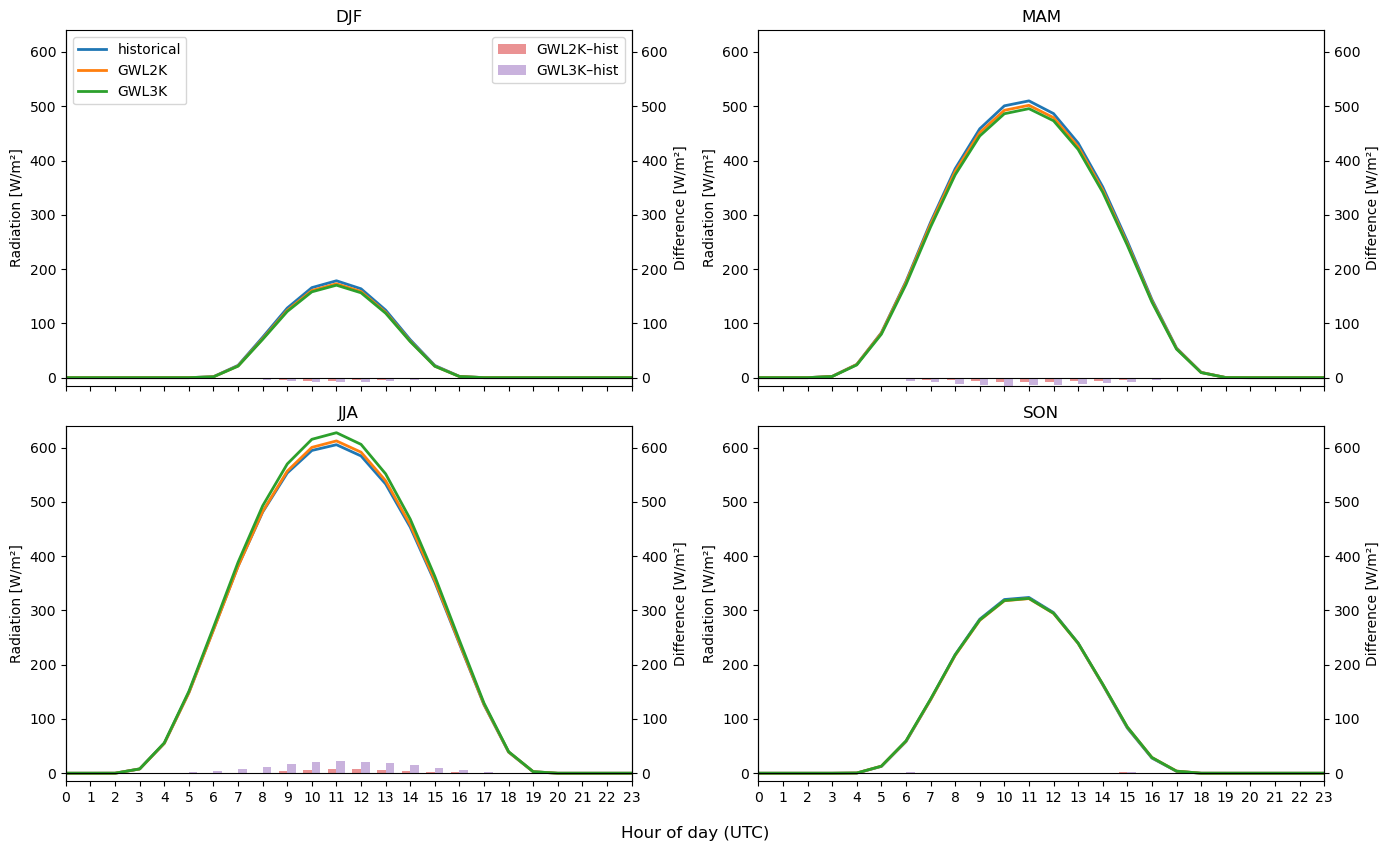

In [5]:
# PV_daily_cycle_all_seasons
import json

import matplotlib.pyplot as plt
import numpy as np

region = "Germany"
dataset = "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_rsds"
seasons = ["DJF", "MAM", "JJA", "SON"]

# Pre-load to compute global limits
all_hist, all_diff2, all_diff3 = [], [], []
for season in seasons:
    with open(f"rsds/{region}.json") as f:
        d = json.load(f)[dataset]
        hist = np.array(d["historical"][season]["diurnal_cycle"])
        gwl2 = np.array(d["ssp370-GWL2K"][season]["diurnal_cycle"])
        gwl3 = np.array(d["ssp370-GWL3K"][season]["diurnal_cycle"])
    all_hist.append((hist, gwl2, gwl3))
    all_diff2.append(gwl2 - hist)
    all_diff3.append(gwl3 - hist)

# Compute y-limits
hists = np.concatenate([np.concatenate(x) for x in all_hist])
diffs2 = np.concatenate(all_diff2)
diffs3 = np.concatenate(all_diff3)
rad_min, rad_max = 0, hists.max() * 1.02
diff_min, diff_max = (
    min(diffs2.min(), diffs3.min()) * 1.02,
    max(diffs2.max(), diffs3.max()) * 1.02,
)

# Setup 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=True)
axes = axes.ravel()
hours = np.arange(len(all_hist[0][0]))

for i, (ax, (hist, gwl2, gwl3), diff2, diff3, season) in enumerate(
    zip(axes, all_hist, all_diff2, all_diff3, seasons)
):
    # Plot lines
    ax.plot(hours, hist, color="tab:blue", lw=2, label="historical")
    ax.plot(hours, gwl2, color="tab:orange", lw=2, label="GWL2K")
    ax.plot(hours, gwl3, color="tab:green", lw=2, label="GWL3K")
    ax.set_ylim(diff_min, rad_max)
    ax.set_xlim(0, 23)
    ax.set_title(season)
    ax.set_xticks(hours)
    ax.set_ylabel("Radiation [W/m²]")

    # Twin for bars
    ax2 = ax.twinx()
    bw = 0.35
    ax2.bar(
        hours - bw / 2, diff2, width=bw, alpha=0.5, color="tab:red", label="GWL2K–hist"
    )
    ax2.bar(
        hours + bw / 2,
        diff3,
        width=bw,
        alpha=0.5,
        color="tab:purple",
        label="GWL3K–hist",
    )
    ax2.spines["bottom"].set_position(("data", 0))
    ax2.spines["top"].set_visible(False)
    ax2.set_ylim(diff_min, rad_max)
    ax2.set_ylabel("Difference [W/m²]")

    # Only on the first subplot do we add both legends
    if i == 0:
        ax.legend(loc="upper left")
        ax2.legend(loc="upper right")

# Global labels/title
fig.supxlabel("Hour of day (UTC)")
# fig.suptitle(f"{region} — {dataset}", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Save & show
fig.savefig("Publikation/Figures/PV_daily_cycle_all_seasons_shared_axes.pdf", dpi=300)
plt.show()


In [6]:
# PV Table with multirow grouping for GCM and RCM
import json
from collections import defaultdict

# 1) Load data
with open("rsds/Germany.json", encoding="utf-8") as f:
    wind_stats = json.load(f)

# 2) Flatten out (res, gcm, rcm, scenario, mean) — always use "Year"
season = "Year"
entries = []

for ds_name, ds in wind_stats.items():
    if ds_name == "edges":
        continue
    parts = ds_name.split("_")
    if len(parts) < 3:
        continue
    res = parts[0]
    gcm = parts[1]
    rcm = parts[2]
    if rcm == "CLMcom-Hereon-CCLM-6-0-clm3":
        rcm = "CLMcom-Hereon-CCLM-6-0-clm2"
    for scen, stats in ds.items():
        mean_val = stats.get(season, {}).get("mean")
        if mean_val is None:
            continue
        entries.append((res, gcm, rcm, scen, f"{round(mean_val, 1):.1f}"))

# 3) Group by GCM -> RCM -> list of (scenario, CEU-3, EUR-11)
grouped = defaultdict(
    lambda: defaultdict(lambda: defaultdict(lambda: {"CEU-3": None, "EUR-11": None}))
)
# temporary structure keyed by (gcm, rcm, scen) to collect resolutions
tmp = defaultdict(lambda: {"CEU-3": None, "EUR-11": None})
for res, gcm, rcm, scen, val in entries:
    key = (gcm, rcm, scen)
    tmp[key][res] = val

# move into grouped preserving order by sorting keys
for (gcm, rcm, scen), resmap in sorted(tmp.items()):
    grouped[gcm][rcm][scen] = resmap

# 4) Replacement map for nicer labels
replacement_map = {
    "EC-Earth-Consortium-EC-Earth3-Veg": "EC-Earth",
    "MIROC-MIROC6": "MIROC",
    "MPI-M-MPI-ESM1-2-HR": "MPI-ESM",
    "CLMcom-BTU-ICON-2-6-5-rc": "ICON",
    "CLMcom-KIT-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm3": "CCLM",
}

# 5) Build LaTeX with multirow grouping for GCM and RCM
lines = [
    "\\begin{table}[!htbp]",
    "\\centering",
    "\\caption{Mean Surface Downwelling Shortwave Radiation grouped by resolution, GCM, RCM, and scenario.}",
    "\\label{Table:rsds_mean_values}",
    "\\begin{tabular}{lll|cc}",
    "\\toprule",
    "GCM & RCM & scenario & \\multicolumn{2}{c}{rsds [\\si{\\watt\\per\\square\\meter}]} \\\\",
    " &  &  & CEU-3 & EUR-11 \\\\",
    "\\midrule",
]

gcm_items = list(grouped.items())
for gi, (gcm, rcm_blocks) in enumerate(gcm_items):
    # total rows for this GCM (sum of scenarios across its RCMs)
    gcm_total = sum(len(scenarios) for scenarios in rcm_blocks.values())
    gcm_mr = f"\\multirow{{{gcm_total}}}{{*}}{{{latex_escape(replace_label(gcm))}}}"
    first_gcm = True

    rcm_items = list(rcm_blocks.items())
    for ri, (rcm, scenarios) in enumerate(rcm_items):
        # number of scenario rows for this RCM
        rcm_total = len(scenarios)
        rcm_mr = f"\\multirow{{{rcm_total}}}{{*}}{{{latex_escape(replace_label(rcm))}}}"
        first_rcm = True

        scen_items = list(scenarios.items())
        for si, (scen, resmap) in enumerate(scen_items):
            row = []
            # GCM cell?
            row.append(gcm_mr if first_gcm else "")
            # RCM cell?
            row.append(rcm_mr if first_rcm else "")
            # scenario + CEU-3 + EUR-11
            ceu = resmap.get("CEU-3") or ""
            eur = resmap.get("EUR-11") or ""
            row.extend([latex_escape(scen), ceu, eur])
            lines.append(" & ".join(row) + " \\\\")
            first_gcm = False
            first_rcm = False

        # after each RCM block draw a partial rule from col 2 to the end

        lines.append("\\cmidrule(lr){2-5}")

    # after each GCM block draw a full rule (use cmidrule 1-5) except after last
    if gi < len(gcm_items) - 1:
        lines[-1] = "\\cmidrule(lr){1-5}"
    else:
        # remove last cmidrule inserted for the final RCM block if present
        if lines and lines[-1].startswith("\\cmidrule"):
            lines.pop()

lines.append("\\bottomrule")
lines.append("\\end{tabular}")
lines.append("\\end{table}")

# 6) Write out
with open("Publikation/Tables/PV_table.tex", "w", encoding="utf-8") as out_file:
    out_file.write("\n".join(lines))


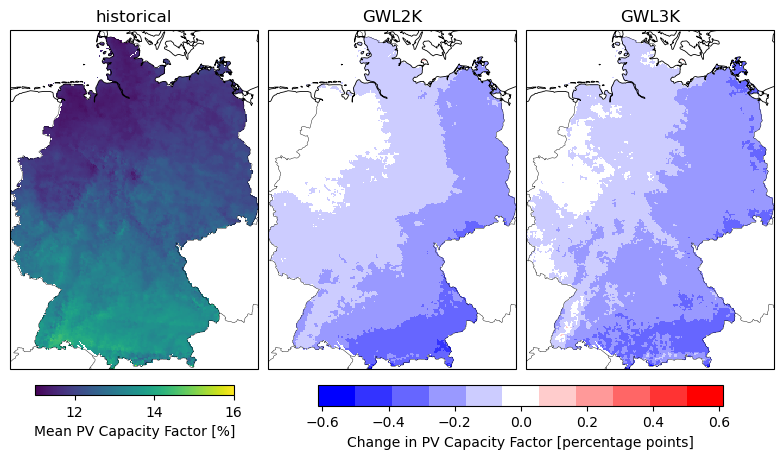

Mean value historical: 12.5%
Mean value GWL2K: 12.3%
Mean value GWL3K: 12.3%
Mean difference GWL2K: -0.2%
Mean difference GWL3K: -0.2%


In [7]:
# Changes to CF_PV
import json

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Define rotated pole projection manually
rotated_pole = ccrs.RotatedPole(
    pole_longitude=198.0, pole_latitude=39.25
)  # Example values

fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(14, 4.5),
    subplot_kw=dict(projection=rotated_pole),
    layout="compressed",
)


discrete_cmap = plt.get_cmap("bwr", 11)
discrete_cmap.set_bad(color=(0, 0, 0, 0))

with open("CF_PV/Germany.json", "r", encoding="utf-8") as file:
    file_locations = json.load(file)
    data_location = file_locations[
        "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_CF_PV"
    ]
    file_1 = xr.open_dataset(data_location["historical"]["Year"]["timmean"])
    file_2 = xr.open_dataset(data_location["ssp370-GWL2K"]["Year"]["timmean"])
    file_3 = xr.open_dataset(data_location["ssp370-GWL3K"]["Year"]["timmean"])

    historical = file_1["CF_PV"].values
    GWL2K = file_2["CF_PV"].values - file_1["CF_PV"].values
    GWL3K = file_3["CF_PV"].values - file_1["CF_PV"].values

    v_min = min(np.nanmin(GWL2K), np.nanmin(GWL3K)) * 100
    v_max = max(np.nanmax(GWL2K), np.nanmax(GWL3K)) * 100
    if abs(v_min) > abs(v_max):
        v_max = abs(v_min)
    else:
        v_min = -v_max

    files = [GWL2K, GWL3K]
    scenarios = ["GWL2K", "GWL3K"]

    ax = axes[0]
    cf_flaute = historical * 100
    lat = file_1["lat"].values
    lon = file_1["lon"].values

    cf_masked = np.squeeze(np.ma.masked_equal(cf_flaute, 0))
    pm1 = ax.pcolormesh(
        lon,
        lat,
        cf_masked,
        cmap="viridis",
        vmin=np.floor(np.nanmin(cf_masked)),
        vmax=np.ceil(np.nanmax(cf_masked)),
        shading="auto",
        transform=ccrs.PlateCarree(),
        rasterized=True,
    )  # Assuming lat/lon are in regular geographic coords

    ax.coastlines(linewidth=0.6)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.set_title("historical", fontsize=12)

    for index, (file, scenario) in enumerate(zip(files, scenarios)):
        ax = axes[index + 1]
        cf_flaute = file * 100
        lat = file_1["lat"].values
        lon = file_1["lon"].values

        cf_masked = np.squeeze(np.ma.masked_equal(cf_flaute, 0))

        pm = ax.pcolormesh(
            lon,
            lat,
            cf_masked,
            cmap=discrete_cmap,
            vmin=v_min,
            vmax=v_max,
            shading="auto",
            transform=ccrs.PlateCarree(),
            rasterized=True,
        )  # Assuming lat/lon are in regular geographic coords

        ax.coastlines(linewidth=0.6)
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        ax.set_title(scenario, fontsize=12)

    cbar = fig.colorbar(
        pm1,
        ax=axes[0],
        orientation="horizontal",
        pad=0.05,
        shrink=0.8,
        label="Mean PV Capacity Factor [%]",
    )
    cbar = fig.colorbar(
        pm,
        ax=axes[1:3].ravel().tolist(),
        orientation="horizontal",
        pad=0.05,
        shrink=0.8,
        label="Change in PV Capacity Factor [percentage points]",
    )
    plt.savefig(
        "Publikation/Figures/CF_PV_change_scenarios.pdf",
        bbox_inches="tight",
        format="pdf",
        dpi=300,
    )
    plt.show()

    print(
        f"Mean value historical: {round(np.nanmean(file_1['CF_PV'].values) * 100, 1):.1f}%"
    )
    print(f"Mean value GWL2K: {round(file_2['CF_PV'].mean().item() * 100, 1):.1f}%")
    print(f"Mean value GWL3K: {round(file_3['CF_PV'].mean().item() * 100, 1):.1f}%")
    print(f"Mean difference GWL2K: {round(np.nanmean(GWL2K) * 100, 1):.1f}%")
    print(f"Mean difference GWL3K: {round(np.nanmean(GWL3K) * 100, 1):.1f}%")

Mean value historical 3_3MW: 26.9%
Mean value GWL2K 3_3MW: 27.2%
Mean value GWL3K 3_3MW: 28.6%
Mean difference GWL2K 3_3MW: 0.4%
Mean difference GWL3K 3_3MW: 1.7%
Mean value historical 5MW: 40.0%
Mean value GWL2K 5MW: 40.5%
Mean value GWL3K 5MW: 42.1%
Mean difference GWL2K 5MW: 0.4%
Mean difference GWL3K 5MW: 2.0%


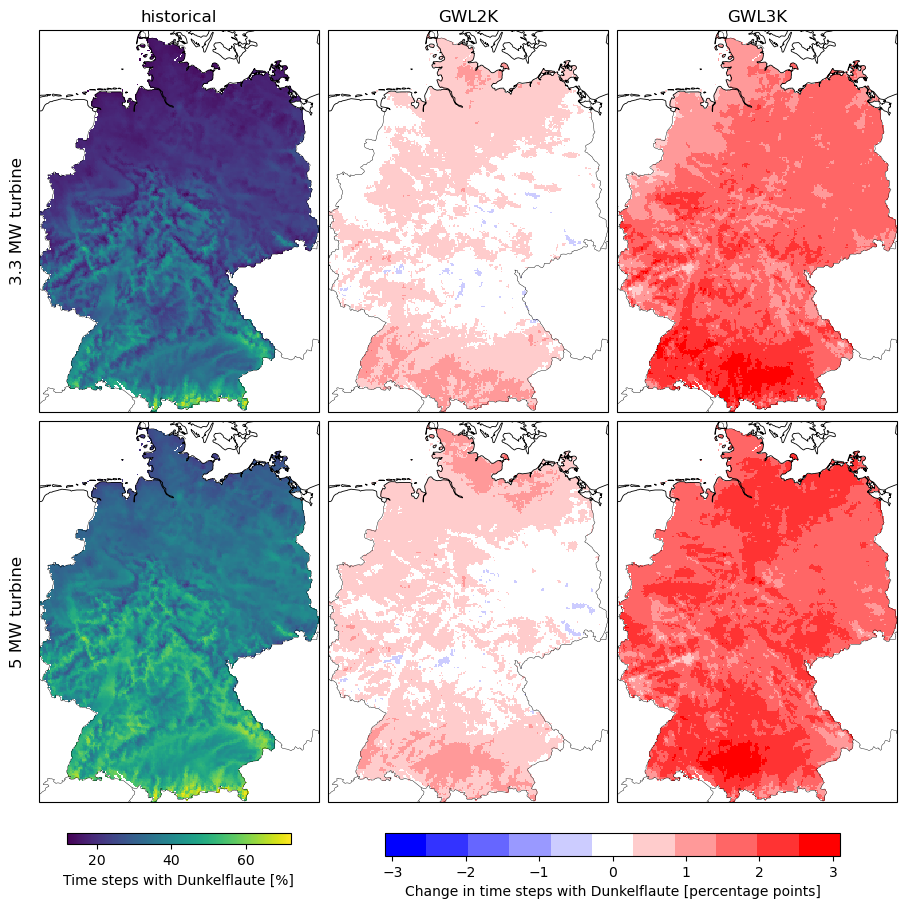

In [9]:
# Dunkelflaute Germany (figure) with shared colorbars
import json

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Define rotated pole projection manually
rotated_pole = ccrs.RotatedPole(pole_longitude=198.0, pole_latitude=39.25)

turbine_list = ["3_3MW", "5MW"]

# Create figure for all turbines: 2 rows × 3 cols
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(14, 9),
    subplot_kw=dict(projection=rotated_pole),
    layout="compressed",
)

# Colormap for future scenarios
discrete_cmap = plt.get_cmap("bwr", 11)
discrete_cmap.set_bad(color=(0, 0, 0, 0))

# Read JSON once
with open("Dunkelflaute/Germany.json", "r", encoding="utf-8") as file:
    file_locations = json.load(file)

# Store pcolormesh handles for shared colorbars
historical_pms = []
future_pms = []

# Determine shared vmin/vmax for historical plots
historical_vmin = np.inf
historical_vmax = -np.inf

# First pass: find global min/max for historical
for turbine in turbine_list:
    data_location = file_locations[turbine][
        "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_Dunkelflaute"
    ]
    file_1 = xr.open_dataset(data_location["historical"]["Year"]["timmean"])
    historical = file_1["Dunkelflaute"].values * 100
    cf_masked_hist = np.squeeze(np.ma.masked_equal(historical, 0))
    historical_vmin = min(historical_vmin, np.nanmin(cf_masked_hist))
    historical_vmax = max(historical_vmax, np.nanmax(cf_masked_hist))

# Second pass: plot everything
for i, turbine in enumerate(turbine_list):
    data_location = file_locations[turbine][
        "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_Dunkelflaute"
    ]
    file_1 = xr.open_dataset(data_location["historical"]["Year"]["timmean"])
    file_2 = xr.open_dataset(data_location["ssp370-GWL2K"]["Year"]["timmean"])
    file_3 = xr.open_dataset(data_location["ssp370-GWL3K"]["Year"]["timmean"])

    historical = file_1["Dunkelflaute"].values
    GWL2K = file_2["Dunkelflaute"].values - file_1["Dunkelflaute"].values
    GWL3K = file_3["Dunkelflaute"].values - file_1["Dunkelflaute"].values

    # Shared vmin/vmax for future scenarios
    v_min = min(np.nanmin(GWL2K), np.nanmin(GWL3K)) * 100
    v_max = max(np.nanmax(GWL2K), np.nanmax(GWL3K)) * 100
    if abs(v_min) > abs(v_max):
        v_max = abs(v_min)
    else:
        v_min = -v_max

    files = [GWL2K, GWL3K]
    scenarios = ["GWL2K", "GWL3K"]

    lon = file_1["lon"].values
    lat = file_1["lat"].values

    # Historical subplot
    ax = axes[i, 0]
    cf_hist = historical * 100
    cf_masked_hist = np.squeeze(np.ma.masked_equal(cf_hist, 0))
    pm1 = ax.pcolormesh(
        lon,
        lat,
        cf_masked_hist,
        cmap="viridis",
        vmin=np.floor(historical_vmin),
        vmax=np.ceil(historical_vmax),
        shading="auto",
        transform=ccrs.PlateCarree(),
        rasterized=True,
    )
    ax.coastlines(linewidth=0.6)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    if i == 0:
        ax.set_title("historical", fontsize=12)
    historical_pms.append(pm1)

    # Future scenarios
    for idx, (arr, scenario) in enumerate(zip(files, scenarios)):
        ax = axes[i, idx + 1]
        cf_future = arr * 100
        cf_masked_future = np.squeeze(np.ma.masked_equal(cf_future, 0))
        pm = ax.pcolormesh(
            lon,
            lat,
            cf_masked_future,
            cmap=discrete_cmap,
            vmin=v_min,
            vmax=v_max,
            shading="auto",
            transform=ccrs.PlateCarree(),
            rasterized=True,
        )
        ax.coastlines(linewidth=0.6)
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        if i == 0:
            ax.set_title(f"{scenario}", fontsize=12)
        future_pms.append(pm)

    # Print stats
    print(
        f"Mean value historical {turbine}: {round(np.nanmean(historical) * 100, 1):.1f}%"
    )
    print(
        f"Mean value GWL2K {turbine}: {round(file_2['Dunkelflaute'].mean().item() * 100, 1):.1f}%"
    )
    print(
        f"Mean value GWL3K {turbine}: {round(file_3['Dunkelflaute'].mean().item() * 100, 1):.1f}%"
    )
    print(f"Mean difference GWL2K {turbine}: {round(np.nanmean(GWL2K) * 100, 1):.1f}%")
    print(f"Mean difference GWL3K {turbine}: {round(np.nanmean(GWL3K) * 100, 1):.1f}%")

axes[1, 0].text(
    -0.05,  # x-position in axes‐fraction coords (tweak to taste)
    0.5,  # y-position in axes‐fraction coords (center vertically)
    "5 MW turbine",  # the text you want
    transform=axes[1, 0].transAxes,
    va="center",  # vertical alignment
    ha="right",  # horizontal alignment
    rotation="vertical",  # orient text vertically
    fontsize=12,
)
axes[0, 0].text(
    -0.05,  # x-position in axes‐fraction coords (tweak to taste)
    0.5,  # y-position in axes‐fraction coords (center vertically)
    "3.3 MW turbine",  # the text you want
    transform=axes[0, 0].transAxes,
    va="center",  # vertical alignment
    ha="right",  # horizontal alignment
    rotation="vertical",  # orient text vertically
    fontsize=12,
)

# Shared colorbars
fig.colorbar(
    historical_pms[0],
    ax=axes[:, 0].ravel().tolist(),
    orientation="horizontal",
    pad=0.04,
    shrink=0.8,
    label="Time steps with Dunkelflaute [%]",
)

fig.colorbar(
    future_pms[0],
    ax=axes[:, 1:].ravel().tolist(),
    orientation="horizontal",
    pad=0.04,
    shrink=0.8,
    label="Change in time steps with Dunkelflaute [percentage points]",
)

# Save and show
plt.savefig(
    "Publikation/Figures/Dunkelflaute_change_scenarios_combined.pdf",
    bbox_inches="tight",
    dpi=300,
    format="pdf",
)
plt.show()


In [ ]:
# Dunkelflaute table generator that reproduces the LaTeX layout you provided
# - Columns: GCM | RCM | scenario | (3.3 CEU-3, 3.3 EUR-11, 5 CEU-3, 5 EUR-11)
# - multirow for GCM and RCM, cmidrule placement matching the example
import json
from collections import OrderedDict

import numpy as np
import xarray as xr


def latex_escape(s):
    return s.replace("_", "\\_")


# ---- config ----
input_file = "Dunkelflaute/Germany.json"
out_file = "Publikation/Tables/Dunkelflaute_changes.tex"
season = "Year"
turbines = ["3_3MW", "5MW"]
replacement_map = {
    "EC-Earth-Consortium-EC-Earth3-Veg": "EC-Earth",
    "MIROC-MIROC6": "MIROC",
    "MPI-M-MPI-ESM1-2-HR": "MPI-ESM",
    "CLMcom-BTU-ICON-2-6-5-rc": "ICON",
    "CLMcom-KIT-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm3": "CCLM",
}


def replace_label(s):
    for old, new in replacement_map.items():
        s = s.replace(old, new)
    return s


# ---- load and collect ----
with open(input_file, encoding="utf-8") as f:
    dunkel = json.load(f)

# grouped[res][gcm][rcm][scen] = {"3_3MW": val_or_empty, "5MW": val_or_empty}
grouped = OrderedDict()
for turbine in turbines:
    block = dunkel.get(turbine, {})
    for ds_name, ds in block.items():
        if ds_name == "edges":
            continue
        parts = ds_name.split("_")
        if len(parts) < 3:
            continue
        res, gcm, rcm = parts[0], parts[1], parts[2]
        if rcm == "CLMcom-Hereon-CCLM-6-0-clm3":
            rcm = "CLMcom-Hereon-CCLM-6-0-clm2"
        for scen, stats in ds.items():
            fld = stats.get(season, {}).get("fldmean")
            if not fld:
                continue
            try:
                with xr.open_dataset(fld) as xrds:
                    mean_val = np.nanmean(xrds["Dunkelflaute"].values)
                if mean_val is None or np.isnan(mean_val):
                    continue
                pct = f"{round(mean_val * 100, 1):.1f}"
            except Exception:
                continue
            grouped.setdefault(res, OrderedDict())
            grouped[res].setdefault(gcm, OrderedDict())
            grouped[res][gcm].setdefault(rcm, OrderedDict())
            grouped[res][gcm][rcm].setdefault(scen, {"3_3MW": "", "5MW": ""})
            grouped[res][gcm][rcm][scen][turbine] = pct

# ---- Build LaTeX ----
lines = [
    r"\begin{table}[!htbp]",
    r"\centering",
    r"\caption{Percentage of time steps with Dunkelflaute grouped by GCM, RCM, and scenario. The results are presented for \qty{3.3}{\mega\watt} and \qty{5}{\mega\watt} wind turbines in Germany.}",
    r"\label{Table:Dunkelflaute_changes}",
    r"\begin{tabular}{lll|cc|cc}",
    r"\toprule",
    r"GCM & RCM & scenario & \multicolumn{4}{c}{Dunkelflaute time steps [\%]} \\",
    r" & & & \multicolumn{2}{c}{3.3\si{\mega\watt}} & \multicolumn{2}{c}{5\si{\mega\watt}} \\",
    r" & & & CEU-3 & EUR-11 & CEU-3 & EUR-11 \\",
    r"\midrule",
    r"\cmidrule(lr){1-7}",
]

# order of resolutions that supply columns (CEU-3 left pair, EUR-11 right pair)
res_left = "CEU-3"
res_right = "EUR-11"

# determine unified GCM order using keys present in either resolution, but prefer CEU-3 order
gcm_order = []
if res_left in grouped:
    gcm_order.extend(list(grouped[res_left].keys()))
if res_right in grouped:
    for g in grouped[res_right].keys():
        if g not in gcm_order:
            gcm_order.append(g)

# iterate GCMs
for gi, gcm in enumerate(gcm_order):
    # collect rcm order from left resolution if present, else from right
    rcm_order = []
    if res_left in grouped and gcm in grouped[res_left]:
        rcm_order.extend(list(grouped[res_left][gcm].keys()))
    if res_right in grouped and gcm in grouped[res_right]:
        for r in grouped[res_right][gcm].keys():
            if r not in rcm_order:
                rcm_order.append(r)

    # compute multirow heights (sum of scenarios across rcm_order using left then right as fallback)
    gcm_total = 0
    for rcm in rcm_order:
        scens = []
        if (
            res_left in grouped
            and gcm in grouped[res_left]
            and rcm in grouped[res_left][gcm]
        ):
            scens = list(grouped[res_left][gcm][rcm].keys())
        elif (
            res_right in grouped
            and gcm in grouped[res_right]
            and rcm in grouped[res_right][gcm]
        ):
            scens = list(grouped[res_right][gcm][rcm].keys())
        gcm_total += len(scens)
    gcm_mr = f"\\multirow{{{gcm_total}}}{{*}}{{{latex_escape(replace_label(gcm))}}}"
    first_gcm = True

    # iterate RCMs
    for ri, rcm in enumerate(rcm_order):
        # scenario list: prefer CEU-3 listing, else EUR-11
        scen_list = []
        if (
            res_left in grouped
            and gcm in grouped[res_left]
            and rcm in grouped[res_left][gcm]
        ):
            scen_list = list(grouped[res_left][gcm][rcm].items())
        elif (
            res_right in grouped
            and gcm in grouped[res_right]
            and rcm in grouped[res_right][gcm]
        ):
            scen_list = list(grouped[res_right][gcm][rcm].items())
        rcm_total = len(scen_list)
        rcm_mr = f"\\multirow{{{rcm_total}}}{{*}}{{{latex_escape(replace_label(rcm))}}}"
        first_rcm = True

        for scen, _vals in scen_list:
            # fetch CEU-3 and EUR-11 maps for this gcm/rcm/scen, default to empty dict
            ceu_map = (
                grouped.get(res_left, {})
                .get(gcm, {})
                .get(rcm, {})
                .get(scen, {"3_3MW": "", "5MW": ""})
            )
            eur_map = (
                grouped.get(res_right, {})
                .get(gcm, {})
                .get(rcm, {})
                .get(scen, {"3_3MW": "", "5MW": ""})
            )

            t33_ceu = ceu_map.get("3_3MW") or ""
            t33_eur = eur_map.get("3_3MW") or ""
            t5_ceu = ceu_map.get("5MW") or ""
            t5_eur = eur_map.get("5MW") or ""

            row = [
                gcm_mr if first_gcm else "",
                rcm_mr if first_rcm else "",
                latex_escape(scen),
                t33_ceu,
                t33_eur,
                t5_ceu,
                t5_eur,
            ]
            lines.append(" & ".join(row) + r" \\")

            first_gcm = False
            first_rcm = False

        # after each RCM block draw cmidrule(lr){2-7} as in the example
        lines.append(r"\cmidrule(lr){2-7}")

    # after each GCM block: nothing extra in the example except the sequence of cmidrule(2-7)
    # (the example does not use an additional cmidrule(1-7) between GCMs in the middle of the table)

# remove trailing cmidrule if present
if lines and lines[-1].startswith("\\cmidrule"):
    lines.pop()

lines += [r"\bottomrule", r"\end{tabular}", r"\end{table}"]

# ---- write output ----
with open(out_file, "w", encoding="utf-8") as f:
    f.write("\n".join(lines))


In [ ]:
# Changes to Dunkelflaute Germany (regions)
import json

import numpy as np
import xarray as xr

regions = [
    "Duisburg",
    "Germany",
    "IAWAK-EE",
    "ISAP",
    "KARE",
    "KlimaKonform",
    "WAKOS",
]

region_abbreviations = {
    "Duisburg": "DUI",
    "Germany": "GER",
    "IAWAK-EE": "EE",
    "ISAP": "STU",
    "KARE": "PAR",
    "KlimaKonform": "TSA",
    "WAKOS": "EF",
}

lines = [
    "\\begin{table}[!htbp]",
    "\\centering",
    "\\caption{Percentage of time steps with Dunkelflaute by region. For region abbreviations see \\autoref{FIG:NUKLEUS_region}. Additionally, the difference under \\qty{2}{\\kelvin} and \\qty{3}{\\kelvin} global warming are shown in percentage points.}",
    "\\label{Table:Dunkelflaute_regions}",
    "\\begin{tabular}{cccc}",
    "\\hline",
    "Region & Historical (\\%) & $\\Delta$ GWL2K [percentage points] & $\\Delta$ GWL3K [percentage points] \\\\",
    "\\hline",
]
for region in regions:
    with open(f"Dunkelflaute/{region}.json", "r", encoding="utf-8") as file:
        file_locations = json.load(file)
        data_location = file_locations["3_3MW"][
            "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_Dunkelflaute"
        ]
        file_1 = xr.open_dataset(data_location["historical"]["Year"]["timmean"])
        file_2 = xr.open_dataset(data_location["ssp370-GWL2K"]["Year"]["timmean"])
        file_3 = xr.open_dataset(data_location["ssp370-GWL3K"]["Year"]["timmean"])

        GWL2K = file_2["Dunkelflaute"].values - file_1["Dunkelflaute"].values
        GWL3K = file_3["Dunkelflaute"].values - file_1["Dunkelflaute"].values

        extra = round(np.nanmean(GWL2K) * 100, 1)
        if extra < 0:
            extra = 0

        lines += [
            f"{region_abbreviations.get(region)} & {round(np.nanmean(file_1['Dunkelflaute'].values) * 100, 1):.1f} & "
            f"{extra:.1f} & {round(np.nanmean(GWL3K) * 100, 1):.1f}\\\\\n"
        ]

lines += [
    "\\bottomrule",
    "\\end{tabular}",
    "\\end{table}",
]

with open("Publikation/Tables/Dunkelflaute_regions.tex", "w") as file:
    for item in lines:
        file.write(item + "\n")

In [ ]:
# Dunkelflaute monthly distribution
import json

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

turbine = "3_3MW"
plt.figure(figsize=(10, 5))
# 1. Load your datasets
scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]
for scenario in scenarios:
    with (
        open("CF_Wind/Germany.json", "r", encoding="utf-8") as CF_Wind_file,
        open("CF_PV/Germany.json", "r", encoding="utf-8") as CF_PV_file,
    ):
        file_locations_CF_Wind = json.load(CF_Wind_file)
        file_locations_CF_PV = json.load(CF_PV_file)
        d_Wind = xr.open_dataset(
            file_locations_CF_Wind[turbine][
                "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_CF_Wind"
            ][scenario]["Year"]["fldmean"]
        )
        d_PV = xr.open_dataset(
            file_locations_CF_PV[
                "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_CF_PV"
            ][scenario]["Year"]["fldmean"]
        )
        # 2. Select the variables
        data_Wind = d_Wind["CF_Wind"]
        data_PV = d_PV["CF_PV"]

        # 3. Create a mask where both are < 0.2
        combined_mask = ((data_Wind < 0.2) & (data_PV < 0.2)).astype(int)

        # Convert to 1D NumPy array
        values = combined_mask.values.flatten()

        # Step 1: Identify sequences of 1s ≥ 24 long
        mask = np.zeros_like(values)

        counter = 0
        for i, val in enumerate(values):
            if val == 1:
                counter += 1
            else:
                if counter > 24:
                    mask[i - counter : i] = 1
                counter = 0

        # Catch final sequence if it ends at the last value
        if counter > 24:
            mask[len(values) - counter :] = 1

        # Step 2: Create a new DataArray with the filtered mask
        filtered = xr.DataArray(mask, coords={"time": data_Wind.time}, dims="time")

        # Step 3: Group by month and sum
        monthly_sum = filtered.groupby("time.month").sum() / 30

        # Step 4: Plot the result

        monthly_sum.plot(linestyle="-", label=scenario)
# plt.title("Average monthly duration of dunkelflaute events longer than 24 hours (30-year mean)")
plt.xlabel("Month")
plt.ylabel("Hours per month")
plt.grid(True)
plt.legend()
plt.xlim(1, 12)
plt.xticks(
    np.arange(1, 13),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)
plt.tight_layout()
plt.savefig(
    f"Publikation/Figures/Dunkelflaute_{turbine}_monthly_distribution.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)

plt.show()

In [ ]:
# Wind turbine power curve
import matplotlib.pyplot as plt
import numpy as np

_WIND_3_3 = np.array(
    [
        0,
        3.25,
        3.25,
        3.5,
        3.75,
        4.0,
        4.25,
        4.5,
        4.75,
        5.0,
        5.25,
        5.5,
        5.75,
        6.0,
        6.25,
        6.5,
        6.75,
        7.0,
        7.25,
        7.5,
        7.75,
        8.0,
        8.25,
        8.5,
        8.75,
        9.0,
        9.25,
        9.5,
        9.75,
        10.0,
        10.25,
        10.5,
        10.75,
        11.0,
        25,
        25,
        30,
    ],
    dtype=np.float32,
)

_POWER_3_3 = np.array(
    [
        0,
        0,
        138,
        173,
        223,
        286,
        358,
        440,
        529,
        623,
        722,
        827,
        941,
        1069,
        1211,
        1367,
        1535,
        1715,
        1903,
        2096,
        2290,
        2482,
        2666,
        2835,
        2979,
        3088,
        3159,
        3198,
        3219,
        3232,
        3247,
        3265,
        3282,
        3294,
        3300,
        0,
        0,
    ],
    dtype=np.float32,
)

_WIND_5 = np.array(
    [
        0,
        4,
        4,
        4.25,
        4.5,
        4.75,
        5,
        5.25,
        5.5,
        5.75,
        6,
        6.25,
        6.5,
        6.75,
        7,
        7.25,
        7.5,
        7.75,
        8,
        8.25,
        8.5,
        8.75,
        9,
        9.25,
        9.5,
        9.75,
        10,
        10.25,
        10.5,
        10.75,
        11,
        11.25,
        11.5,
        25,
        25,
        30,
    ],
    dtype=np.float32,
)

_POWER_5 = np.array(
    [
        0,
        0,
        224,
        269,
        319,
        376,
        438,
        507,
        583,
        666,
        757,
        856,
        963,
        1078,
        1202,
        1336,
        1479,
        1632,
        1795,
        1969,
        2153,
        2349,
        2556,
        2775,
        3006,
        3249,
        3506,
        3775,
        4058,
        4355,
        4666,
        4992,
        5000,
        5000,
        0,
        0,
    ],
    dtype=np.float32,
)
fig, ax = plt.subplots(figsize=(8.53, 4.8))
# ax.plot(df["Wind Speed [m/s]"],df["Power [kW]"],label="5MW")
ax.plot(_WIND_3_3, _POWER_3_3, label="3.3 MW turbine")
ax.plot(_WIND_5, _POWER_5, label="5 MW turbine")
ax.set_xlabel("Wind Speed [ms$^{-1}$]")
ax.set_ylabel("Power [kW]")
# ax.set_title("Wind Turbine Power Curve")
plt.legend()
plt.savefig(
    "Publikation/Figures/wind_turbine_power_curve.pdf",
    bbox_inches="tight",
    format="pdf",
    dpi=300,
)
plt.show()

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

replacement_map = {
    "ICON-2-6-5-rc": "ICON",
    "CCLM-6-0-clm2": "CCLM",
    "EC-Earth-Consortium-EC-Earth3-Veg": "EC-Earth",
    "MIROC-MIROC6": "MIROC",
    "MPI-M-MPI-ESM1-2-HR": "MPI-ESM",
}


def escape_latex(text: str) -> str:
    """Escape characters that have special meaning in LaTeX."""
    replacements = {
        "\\": r"\textbackslash{}",
        "&": r"\&",
        "%": r"\%",
        "$": r"\$",
        "#": r"\#",
        "_": r"\_",
        "{": r"\{",
        "}": r"\}",
        "~": r"\textasciitilde{}",
        "^": r"\textasciicircum{}",
    }
    for char, esc in replacements.items():
        text = text.replace(char, esc)
    return text


def generate_latex_table(mapping, caption, label):
    lines = [
        r"\begin{table}[htbp]",
        r"  \centering",
        rf"  \caption{{{caption}}}",
        rf"  \label{{{label}}}",
        r"  \begin{tabular}{p{8cm}l}",  # wide first column
        r"    \toprule",
        r"    Full model name & Abbreviation \\",
        r"    \midrule",
    ]

    # Sort entries by abbreviation for readability
    for full_name, abbr in mapping.items():
        safe_full = escape_latex(full_name)
        lines.append(f"    {safe_full} & {abbr} \\\\")

    lines += [r"    \bottomrule", r"  \end{tabular}", r"\end{table}"]
    return "\n".join(lines) + "\n"


def write_to_file(contents: str, filename: str):
    with open(filename, "w", encoding="utf-8") as texfile:
        texfile.write(contents)
    print(f"Wrote LaTeX table to {filename!r}")


if __name__ == "__main__":
    caption = "List of climate model configurations and their abbreviations used in this study."
    label = "Table:model_abbrevs"
    latex_table = generate_latex_table(replacement_map, caption, label)
    write_to_file(latex_table, "Publikation/Tables/model_abbrevs.tex")


In [ ]:
lines = [
    "\\begin{table}[!htbp]",
    "\\centering",
    "\\caption{This table shows when the global climate models reach the \\qty{2}{\\kelvin} and \\qty{3}{\\kelvin} global warming level with a time window of 30 years. See \\autoref{Table:model_abbrevs} for full model names.}",
    "\\label{Table:GWL}",
    "\\begin{tabular}{|l|l|c|c|}",
    "\\toprule",
    "GCM & scenario & Start & End \\\\",
    "\\midrule",
    "\\multirow{7}{*}{EC-Earth} & historical & 1961 & 1990\\\\",
    " &  ssp245-GWL2K & 2026 & 2055\\\\",
    " &  ssp245-GWL3K & 2062 & 2091\\\\",
    " &  ssp370-GWL2K & 2024 & 2053\\\\",
    " &  ssp370-GWL3K & 2047 & 2076\\\\",
    " &  ssp585-GWL2K & 2019 & 2048\\\\",
    " &  ssp585-GWL3K & 2040 & 2069\\\\",
    "\\cmidrule(lr){1-4}",
    "\\multirow{3}{*}{MIROC} & historical & 1961 & 1990\\\\",
    " &  ssp370-GWL2K & 2038 & 2067\\\\",
    " &  ssp370-GWL3K & 2070 & 2099\\\\",
    "\\cmidrule(lr){1-4}",
    "\\multirow{3}{*}{MPI-ESM} & historical & 1961 & 1990\\\\",
    " &  ssp370-GWL2K & 2037 & 2066\\\\",
    " &  ssp370-GWL3K & 2066 & 2095\\\\",
    "\\bottomrule",
    "\\end{tabular}",
    "\\end{table}",
]


with open("Publikation/Tables/GWL_table.tex", "w") as file:
    for item in lines:
        file.write(item + "\n")

In [ ]:
# Wind statistics printed
import json
from collections import defaultdict

import numpy as np

with open("sfcWind/Germany.json", encoding="utf-8") as f:
    data = json.load(f)

scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]
metrics = {
    "mean": "Mean wind speed",
    "under_cut_in_3MW": "Mean u_c3M",
    "under_cut_in_5MW": "Mean u_c5M",
    "nominal_3MW": "Mean nom3M",
    "nominal_5MW": "Mean nom5M",
}

stats = {sc: defaultdict(list) for sc in scenarios}

for ds_name, ds_content in data.items():
    if ds_name == "edges":
        continue
    for sc, stats_dict in ds_content.items():
        if sc in stats:
            vals = stats_dict.get("Year", {})
            for key in metrics:
                value = vals.get(key)
                if value is not None:
                    stats[sc][key].append(value)

for sc in scenarios:
    print(f"{sc} stats")
    for key, label in metrics.items():
        avg = np.mean(stats[sc][key])
        if key != "mean":
            avg *= 100
            suffix = "%"
        else:
            suffix = ""
        print(f"{label}: {round(avg, 1):.1f}{suffix}")
    if sc != "historical":
        print("Differences to historical")
        for key, label in metrics.items():
            diff = np.mean(stats[sc][key]) - np.mean(stats["historical"][key])
            if key != "mean":
                diff *= 100
                suffix = "%"
            else:
                suffix = ""
            print(f"{label}: {round(diff, 1):.1f}{suffix}")
    print("_" * 20)


In [ ]:
# rsds statistics printed
import json
from collections import defaultdict

import numpy as np

with open("rsds/Germany.json", encoding="utf-8") as f:
    data = json.load(f)

seasons = ["Year", "DJF", "MAM", "JJA", "SON"]
scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]
metrics = {
    "mean": "Mean wind speed",
}

stats = {sc: defaultdict(list) for sc in scenarios}

for season in seasons:
    print(season)
    for ds_name, ds_content in data.items():
        if ds_name == "edges":
            continue
        for sc, stats_dict in ds_content.items():
            if sc in stats:
                vals = stats_dict.get(season, {})
                value = vals.get("mean")
                if value is not None:
                    stats[sc]["mean"].append(value)

    for sc in scenarios:
        print(f"{sc} stats")
        avg = np.mean(stats[sc]["mean"])
        print(f"Mean rsds: {round(avg, 1):.1f}")
        if sc != "historical":
            for key, label in metrics.items():
                diff = np.mean(stats[sc]["mean"]) - np.mean(stats["historical"]["mean"])
                print(f"Differenz rsds: {round(diff, 1):.1f}")
        print("_" * 20)
    print("_" * 40)

In [ ]:
import calendar
import json

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# load JSON index files
with open("CF_Wind/Germany.json", encoding="utf-8") as f:
    wind_index = json.load(f)
with open("CF_PV/Germany.json", encoding="utf-8") as f:
    pv_index = json.load(f)

# pick file paths
wind_path = wind_index["3_3MW"][
    "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_CF_Wind"
]["historical"]["Year"]["fldmean"]
pv_path = pv_index[
    "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_CF_PV"
]["historical"]["Year"]["fldmean"]

# open datasets and group by month
with xr.open_dataset(wind_path) as ds_wind, xr.open_dataset(pv_path) as ds_pv:
    da_wind = ds_wind["CF_Wind"]
    da_pv = ds_pv["CF_PV"]

    wind_monthly = da_wind.groupby("time.month").mean("time")
    pv_monthly = da_pv.groupby("time.month").mean("time")
    mix_monthly = (wind_monthly + pv_monthly) / 2

    months = [calendar.month_abbr[m] for m in wind_monthly["month"].values]

    fig, ax = plt.subplots(figsize=(8.53, 4.8))
    ax.plot(
        wind_monthly["month"],
        wind_monthly.values.flatten(),
        "-o",
        label="3.3 MW turbine CF",
    )
    ax.plot(pv_monthly["month"], pv_monthly.values.flatten(), "-s", label="PV CF")
    ax.plot(mix_monthly["month"], mix_monthly.values.flatten(), "-^", label="mean CF")

    ax.set_xticks(wind_monthly["month"])
    ax.set_xticklabels(months)
    ax.set_xlabel("Month")
    ax.set_ylabel("Capacity factor")
    ax.legend(loc="upper center")
    plt.tight_layout()
    plt.savefig(
        "Publikation/Figures/cf_seasonal_cycle.pdf",
        bbox_inches="tight",
        format="pdf",
        dpi=300,
    )
    plt.show()


In [ ]:
# CF_Wind table generator reproducing the Dunkelflaute-style layout
import json
from collections import OrderedDict

import numpy as np
import xarray as xr


def latex_escape(s):
    return s.replace("_", "\\_")


# Configuration
INPUT = "CF_Wind/Germany.json"
OUT = "Publikation/Tables/CF_Wind_changes.tex"
SEASON = "Year"
TURBINES = ["3_3MW", "5MW"]

REPLACEMENTS = {
    "EC-Earth-Consortium-EC-Earth3-Veg": "EC-Earth",
    "MIROC-MIROC6": "MIROC",
    "MPI-M-MPI-ESM1-2-HR": "MPI-ESM",
    "CLMcom-BTU-ICON-2-6-5-rc": "ICON",
    "CLMcom-KIT-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm3": "CCLM",
}


def replace_label(s):
    for a, b in REPLACEMENTS.items():
        s = s.replace(a, b)
    return s


# Load JSON
with open(INPUT, encoding="utf-8") as f:
    data = json.load(f)

# Build nested structure: grouped[res][gcm][rcm][scen] = {"3_3MW": val_or_empty, "5MW": val_or_empty}
grouped = OrderedDict()
for turb in TURBINES:
    block = data.get(turb, {})
    for ds_name, ds in block.items():
        if ds_name == "edges":
            continue
        parts = ds_name.split("_")
        if len(parts) < 3:
            continue
        res, gcm, rcm = parts[0], parts[1], parts[2]
        if rcm == "CLMcom-Hereon-CCLM-6-0-clm3":
            rcm = "CLMcom-Hereon-CCLM-6-0-clm2"
        for scen, stats in ds.items():
            fld = stats.get(SEASON, {}).get("fldmean")
            if not fld:
                continue
            try:
                with xr.open_dataset(fld) as xrds:
                    mean_val = np.nanmean(xrds["CF_Wind"].values)
                if mean_val is None or np.isnan(mean_val):
                    continue
                pct = f"{round(mean_val * 100, 1):.1f}"
            except Exception:
                continue
            grouped.setdefault(res, OrderedDict())
            grouped[res].setdefault(gcm, OrderedDict())
            grouped[res][gcm].setdefault(rcm, OrderedDict())
            grouped[res][gcm][rcm].setdefault(scen, {"3_3MW": "", "5MW": ""})
            grouped[res][gcm][rcm][scen][turb] = pct

# Desired resolution order for column placement
RES_LEFT = "CEU-3"
RES_RIGHT = "EUR-11"

# Build unified GCM order preferring CEU-3 then EUR-11
gcm_order = []
if RES_LEFT in grouped:
    gcm_order.extend(grouped[RES_LEFT].keys())
if RES_RIGHT in grouped:
    for g in grouped[RES_RIGHT].keys():
        if g not in gcm_order:
            gcm_order.append(g)

# Build LaTeX lines
lines = [
    "\\begin{table}[!htbp]",
    "\\centering",
    "\\caption{Mean wind capacity factor for two turbines. Grouped by GCM, RCM, and scenario. The results are presented for \\qty{3.3}{\\mega\\watt} and \\qty{5}{\\mega\\watt} wind turbines in Germany.}",
    "\\label{Table:CF_Wind_changes}",
    "\\begin{tabular}{lll|cc|cc}",
    "\\toprule",
    "GCM & RCM & scenario & \\multicolumn{4}{c}{Mean capacity factor wind [\\%]} \\\\",
    " & & & \\multicolumn{2}{c}{3.3\\si{\\mega\\watt}} & \\multicolumn{2}{c}{5\\si{\\mega\\watt}} \\\\",
    " & & & CEU-3 & EUR-11 & CEU-3 & EUR-11 \\\\",
    "\\midrule",
    "\\cmidrule(lr){1-7}",
]

# Iterate GCMs and produce multirow blocks; values per row: t33_ceu, t33_eur, t5_ceu, t5_eur
for gi, gcm in enumerate(gcm_order):
    # Determine RCM order preferring CEU-3 then EUR-11
    rcm_order = []
    if RES_LEFT in grouped and gcm in grouped[RES_LEFT]:
        rcm_order.extend(grouped[RES_LEFT][gcm].keys())
    if RES_RIGHT in grouped and gcm in grouped[RES_RIGHT]:
        for r in grouped[RES_RIGHT][gcm].keys():
            if r not in rcm_order:
                rcm_order.append(r)

    # Compute gcm_total (sum of scenario counts across rcm_order, preferring CEU-3 lists)
    gcm_total = 0
    for rcm in rcm_order:
        if (
            RES_LEFT in grouped
            and gcm in grouped[RES_LEFT]
            and rcm in grouped[RES_LEFT][gcm]
        ):
            gcm_total += len(grouped[RES_LEFT][gcm][rcm])
        elif (
            RES_RIGHT in grouped
            and gcm in grouped[RES_RIGHT]
            and rcm in grouped[RES_RIGHT][gcm]
        ):
            gcm_total += len(grouped[RES_RIGHT][gcm][rcm])
    gcm_mr = f"\\multirow{{{gcm_total}}}{{*}}{{{latex_escape(replace_label(gcm))}}}"
    first_gcm = True

    for ri, rcm in enumerate(rcm_order):
        # scenario list prefer CEU-3, else EUR-11
        if (
            RES_LEFT in grouped
            and gcm in grouped[RES_LEFT]
            and rcm in grouped[RES_LEFT][gcm]
        ):
            scen_items = list(grouped[RES_LEFT][gcm][rcm].items())
        elif (
            RES_RIGHT in grouped
            and gcm in grouped[RES_RIGHT]
            and rcm in grouped[RES_RIGHT][gcm]
        ):
            scen_items = list(grouped[RES_RIGHT][gcm][rcm].items())
        else:
            scen_items = []
        rcm_mr = f"\\multirow{{{len(scen_items)}}}{{*}}{{{latex_escape(replace_label(rcm))}}}"
        first_rcm = True

        for scen, _ in scen_items:
            ceu_map = (
                grouped.get(RES_LEFT, {})
                .get(gcm, {})
                .get(rcm, {})
                .get(scen, {"3_3MW": "", "5MW": ""})
            )
            eur_map = (
                grouped.get(RES_RIGHT, {})
                .get(gcm, {})
                .get(rcm, {})
                .get(scen, {"3_3MW": "", "5MW": ""})
            )

            t33_ceu = ceu_map.get("3_3MW") or ""
            t33_eur = eur_map.get("3_3MW") or ""
            t5_ceu = ceu_map.get("5MW") or ""
            t5_eur = eur_map.get("5MW") or ""

            row = [
                gcm_mr if first_gcm else "",
                rcm_mr if first_rcm else "",
                latex_escape(scen),
                t33_ceu,
                t33_eur,
                t5_ceu,
                t5_eur,
            ]
            lines.append(" & ".join(row) + " \\\\")
            first_gcm = False
            first_rcm = False

        # add RCM-level cmidrule as in example
        lines.append("\\cmidrule(lr){2-7}")

# remove trailing cmidrule if present
if lines and lines[-1].startswith("\\cmidrule"):
    lines.pop()

lines += ["\\bottomrule", "\\end{tabular}", "\\end{table}"]

# Write file and apply replacements to labels (for safety replace in lines as well)
with open(OUT, "w", encoding="utf-8") as f:
    for line in lines:
        for old, new in REPLACEMENTS.items():
            line = line.replace(old, new)
        f.write(f"{line}\n")


In [ ]:
# CF_Wind changes printed
import json
from collections import defaultdict

import numpy as np
import xarray as xr

# === Load and process data ===
turbine_types = ["3_3MW", "5MW"]
season = "Year"
scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]

# Dictionary to hold stats per scenario and turbine
stats = {scen: {turbine: [] for turbine in turbine_types} for scen in scenarios}

with open("CF_Wind/Germany.json", encoding="utf-8") as f:
    wind_stats = json.load(f)

for turbine in turbine_types:
    for ds_name, ds in wind_stats[turbine].items():
        if ds_name == "edges":
            continue

        for scen, stats_dict in ds.items():
            if scen in scenarios:
                try:
                    with xr.open_dataset(stats_dict[season]["fldmean"]) as df:
                        mean_val = np.nanmean(df["CF_Wind"].values)
                    if mean_val is not None:
                        stats[scen][turbine].append(mean_val)
                except Exception:
                    continue

# === Print results ===
for scen in scenarios:
    print(f"{scen} stats")
    for turbine in turbine_types:
        avg = np.mean(stats[scen][turbine]) * 100
        print(f"Mean CF for {turbine}: {round(avg, 1):.1f}%")
    if scen != "historical":
        print("Differences to historical")
        for turbine in turbine_types:
            diff = (
                np.mean(stats[scen][turbine]) - np.mean(stats["historical"][turbine])
            ) * 100
            print(f"Mean CF for {turbine}: {round(diff, 1):.1f}%")
    print("_" * 20)


In [ ]:
# Dunkelflaute statistics printed
import json
from collections import defaultdict

import numpy as np
import xarray as xr

# === Load and process data ===
turbine_types = ["3_3MW", "5MW"]
season = "Year"
scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]

# Dictionary to hold stats per scenario and turbine
stats = {scen: {turbine: [] for turbine in turbine_types} for scen in scenarios}

with open("Dunkelflaute/Germany.json", encoding="utf-8") as f:
    wind_stats = json.load(f)

for turbine in turbine_types:
    for ds_name, ds in wind_stats[turbine].items():
        if ds_name == "edges":
            continue

        for scen, stats_dict in ds.items():
            if scen in scenarios:
                try:
                    with xr.open_dataset(stats_dict[season]["fldmean"]) as df:
                        mean_val = np.nanmean(df["Dunkelflaute"].values)
                    if mean_val is not None:
                        stats[scen][turbine].append(mean_val)
                except Exception:
                    continue

# === Print results ===
for scen in scenarios:
    print(f"{scen} stats")
    for turbine in turbine_types:
        avg = np.mean(stats[scen][turbine]) * 100
        print(f"Mean Dunkelflaute for {turbine}: {round(avg, 1):.1f}%")
    if scen != "historical":
        print("Differences to historical")
        for turbine in turbine_types:
            diff = (
                np.mean(stats[scen][turbine]) - np.mean(stats["historical"][turbine])
            ) * 100
            print(f"Mean Dunkelflaute for {turbine}: {round(diff, 1):.1f}%")
    print("_" * 20)


In [ ]:
# CF_PV statistics printed
import json
from collections import defaultdict

import numpy as np
import xarray as xr

# === Load and process data ===
season = "Year"
scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]

# Dictionary to hold stats per scenario
stats = {scen: [] for scen in scenarios}

with open("CF_PV/Germany.json", encoding="utf-8") as f:
    wind_stats = json.load(f)

for ds_name, ds in wind_stats.items():
    if ds_name == "edges":
        continue

    for scen, stats_dict in ds.items():
        if scen in scenarios:
            try:
                with xr.open_dataset(stats_dict[season]["fldmean"]) as df:
                    mean_val = np.nanmean(df["CF_PV"].values)
                if mean_val is not None:
                    stats[scen].append(mean_val)
            except Exception:
                continue

# === Print results ===
for scen in scenarios:
    avg = np.mean(stats[scen]) * 100
    print(f"{scen} stats")
    print(f"Mean CF_PV: {round(avg, 1):.1f}%")
    if scen != "historical":
        hist_avg = np.mean(stats["historical"]) * 100
        diff = avg - hist_avg
        print("Differences to historical")
        print(f"Mean CF_PV: {round(diff, 1):.1f}%")
    print("_" * 20)


In [ ]:
# CF_PV table generator reproducing the grouped/multirow layout (CEU-3 and EUR-11 as two numeric columns)
import json
from collections import OrderedDict

import numpy as np
import xarray as xr


def latex_escape(s):
    return s.replace("_", "\\_")


# Configuration
INPUT = "CF_PV/Germany.json"
OUT = "Publikation/Tables/CF_PV_changes.tex"
SEASON = "Year"

REPLACEMENTS = {
    "EC-Earth-Consortium-EC-Earth3-Veg": "EC-Earth",
    "MIROC-MIROC6": "MIROC",
    "MPI-M-MPI-ESM1-2-HR": "MPI-ESM",
    "CLMcom-BTU-ICON-2-6-5-rc": "ICON",
    "CLMcom-KIT-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm2": "CCLM",
    "CLMcom-Hereon-CCLM-6-0-clm3": "CCLM",
}


def replace_label(s):
    for a, b in REPLACEMENTS.items():
        s = s.replace(a, b)
    return s


# Load JSON
with open(INPUT, encoding="utf-8") as f:
    data = json.load(f)

# Build nested structure: grouped[res][gcm][rcm][scen] = value_str
grouped = OrderedDict()
for ds_name, ds in data.items():
    if ds_name == "edges":
        continue
    parts = ds_name.split("_")
    if len(parts) < 3:
        continue
    res, gcm, rcm = parts[0], parts[1], parts[2]
    if rcm == "CLMcom-Hereon-CCLM-6-0-clm3":
        rcm = "CLMcom-Hereon-CCLM-6-0-clm2"
    for scen, stats in ds.items():
        fld = stats.get(SEASON, {}).get("fldmean")
        if not fld:
            continue
        try:
            with xr.open_dataset(fld) as xrds:
                mean_val = np.nanmean(xrds["CF_PV"].values)
            if mean_val is None or np.isnan(mean_val):
                continue
            val = f"{round(mean_val * 100, 1):.1f}"
        except Exception:
            continue
        grouped.setdefault(res, OrderedDict())
        grouped[res].setdefault(gcm, OrderedDict())
        grouped[res][gcm].setdefault(rcm, OrderedDict())
        grouped[res][gcm][rcm][scen] = val

# Desired resolution order for numeric columns
RES_LEFT = "CEU-3"
RES_RIGHT = "EUR-11"

# Build unified GCM order preferring CEU-3 then EUR-11
gcm_order = []
if RES_LEFT in grouped:
    gcm_order.extend(grouped[RES_LEFT].keys())
if RES_RIGHT in grouped:
    for g in grouped[RES_RIGHT].keys():
        if g not in gcm_order:
            gcm_order.append(g)

# Build LaTeX lines
lines = [
    "\\begin{table}[!htbp]",
    "\\centering",
    "\\caption{Mean PV capacity factor grouped by GCM, RCM, and scenario.}",
    "\\label{Table:CF_PV_changes}",
    "\\begin{tabular}{lll|cc}",
    "\\toprule",
    "GCM & RCM & scenario & \\multicolumn{2}{c}{Mean CF PV [\\%]} \\\\",
    " & & & CEU-3 & EUR-11 \\\\",
    "\\midrule",
    "\\cmidrule(lr){1-5}",
]

for gi, gcm in enumerate(gcm_order):
    # RCM order prefer CEU-3 then EUR-11
    rcm_order = []
    if RES_LEFT in grouped and gcm in grouped[RES_LEFT]:
        rcm_order.extend(grouped[RES_LEFT][gcm].keys())
    if RES_RIGHT in grouped and gcm in grouped[RES_RIGHT]:
        for r in grouped[RES_RIGHT][gcm].keys():
            if r not in rcm_order:
                rcm_order.append(r)

    # compute multirow height for GCM (sum of scenario counts across rcm_order)
    gcm_total = 0
    for rcm in rcm_order:
        if (
            RES_LEFT in grouped
            and gcm in grouped[RES_LEFT]
            and rcm in grouped[RES_LEFT][gcm]
        ):
            gcm_total += len(grouped[RES_LEFT][gcm][rcm])
        elif (
            RES_RIGHT in grouped
            and gcm in grouped[RES_RIGHT]
            and rcm in grouped[RES_RIGHT][gcm]
        ):
            gcm_total += len(grouped[RES_RIGHT][gcm][rcm])
    gcm_mr = f"\\multirow{{{gcm_total}}}{{*}}{{{latex_escape(replace_label(gcm))}}}"
    first_gcm = True

    for rcm in rcm_order:
        # scenario list prefer CEU-3 else EUR-11
        if (
            RES_LEFT in grouped
            and gcm in grouped[RES_LEFT]
            and rcm in grouped[RES_LEFT][gcm]
        ):
            scen_items = list(grouped[RES_LEFT][gcm][rcm].items())
        elif (
            RES_RIGHT in grouped
            and gcm in grouped[RES_RIGHT]
            and rcm in grouped[RES_RIGHT][gcm]
        ):
            scen_items = list(grouped[RES_RIGHT][gcm][rcm].items())
        else:
            scen_items = []
        rcm_mr = f"\\multirow{{{len(scen_items)}}}{{*}}{{{latex_escape(replace_label(rcm))}}}"
        first_rcm = True

        for scen, _ in scen_items:
            ceu_val = grouped.get(RES_LEFT, {}).get(gcm, {}).get(rcm, {}).get(scen, "")
            eur_val = grouped.get(RES_RIGHT, {}).get(gcm, {}).get(rcm, {}).get(scen, "")
            row = [
                gcm_mr if first_gcm else "",
                rcm_mr if first_rcm else "",
                latex_escape(scen),
                ceu_val,
                eur_val,
            ]
            lines.append(" & ".join(row) + " \\\\")
            first_gcm = False
            first_rcm = False

        # add RCM-level cmidrule as in examples
        lines.append("\\cmidrule(lr){2-5}")

# remove trailing cmidrule if present
if lines and lines[-1].startswith("\\cmidrule"):
    lines.pop()

lines += ["\\bottomrule", "\\end{tabular}", "\\end{table}"]

# Write file and apply replacement map to labels inside lines
with open(OUT, "w", encoding="utf-8") as f:
    for line in lines:
        for old, new in REPLACEMENTS.items():
            line = line.replace(old, new)
        f.write(f"{line}\n")


In [ ]:
import json
from collections import defaultdict

import numpy as np
import xarray as xr

# === Load and process data ===
turbine_types = ["3_3MW", "5MW"]
season = "Year"
scenarios = ["historical", "ssp370-GWL2K", "ssp370-GWL3K"]
resolutions = ["EUR-11", "CEU-3"]

# Dictionary to hold stats per scenario, turbine, and resolution
stats = {
    res: {scen: {turbine: [] for turbine in turbine_types} for scen in scenarios}
    for res in resolutions
}

with open("Dunkelflaute/Germany.json", encoding="utf-8") as f:
    wind_stats = json.load(f)

for turbine in turbine_types:
    for ds_name, ds in wind_stats[turbine].items():
        if ds_name == "edges":
            continue

        # Determine resolution from dataset name
        resolution = (
            "CEU-3" if "CEU-3" in ds_name else "EUR-11" if "EUR-11" in ds_name else None
        )
        if resolution not in resolutions:
            continue

        for scen, stats_dict in ds.items():
            if scen in scenarios:
                try:
                    with xr.open_dataset(stats_dict[season]["fldmean"]) as df:
                        mean_val = np.nanmean(df["Dunkelflaute"].values)
                    if mean_val is not None:
                        stats[resolution][scen][turbine].append(mean_val)
                except Exception:
                    continue

# === Print results ===
for resolution in resolutions:
    print(f"\n=== resolution: {resolution} ===")
    for scen in scenarios:
        print(f"{scen} stats")
        for turbine in turbine_types:
            avg = np.mean(stats[resolution][scen][turbine]) * 100
            print(f"Mean Dunkelflaute for {turbine}: {round(avg, 1):.1f}%")
            print(
                f"Spread Dunkelflaute for {turbine}: {(np.max(stats[resolution][scen][turbine]) - np.min(stats[resolution][scen][turbine])) * 100}"
            )
            print(
                f"{np.max(stats[resolution][scen][turbine])}, {np.min(stats[resolution][scen][turbine])}"
            )
        if scen != "historical":
            print("Differences to historical")
            for turbine in turbine_types:
                diff = (
                    np.mean(stats[resolution][scen][turbine])
                    - np.mean(stats[resolution]["historical"][turbine])
                ) * 100
                print(f"Mean Dunkelflaute for {turbine}: {round(diff, 1):.1f}%")
        print("_" * 20)


In [ ]:
# sfcWind_daily_cycle_all_seasons 250m height
import json

import matplotlib.pyplot as plt
import numpy as np

seasons = ["DJF", "MAM", "JJA", "SON"]
edges = np.linspace(0, 30, 101, dtype=np.float64)

# Pre-load to compute global limits
all_hist, all_diff2, all_diff3 = [], [], []
for season in seasons:
    with open("../Data/250m/frequency/historical.json") as f:
        json_data = json.load(f)
        d = json_data[season]
        hist = np.array(d / np.sum(d))

    with open("../Data/250m/frequency/ssp370-GWL2K.json") as f:
        json_data = json.load(f)
        d = json_data[season]
        gwl2 = np.array(d / np.sum(d))
    with open("../Data/250m/frequency/ssp370-GWL3K.json") as f:
        json_data = json.load(f)
        d = json_data[season]
        gwl3 = np.array(d / np.sum(d))
    all_hist.append((hist, gwl2, gwl3))
    all_diff2.append(gwl2 - hist)
    all_diff3.append(gwl3 - hist)

# Compute y-limits
hists = np.concatenate([np.concatenate(x) for x in all_hist])
diffs2 = np.concatenate(all_diff2)
diffs3 = np.concatenate(all_diff3)
rad_min, rad_max = 0, hists.max() * 1.02
diff_min, diff_max = (
    min(diffs2.min(), diffs3.min()) * 1.02,
    max(diffs2.max(), diffs3.max()) * 1.02,
)

# Setup 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=True)
axes = axes.ravel()
hours = np.array(edges[:-1])

for i, (ax, (hist, gwl2, gwl3), diff2, diff3, season) in enumerate(
    zip(axes, all_hist, all_diff2, all_diff3, seasons)
):
    # Plot lines
    ax.plot(hours, hist, color="tab:blue", lw=2, label="historical")
    ax.plot(hours, gwl2, color="tab:orange", lw=2, label="GWL2K")
    ax.plot(hours, gwl3, color="tab:green", lw=2, label="GWL3K")
    ax.set_ylim(diff_min, rad_max)
    ax.set_xlim(0, 30)
    ax.set_title(season)
    ax.set_ylabel("Normalized frequency")

    # Twin for bars
    ax2 = ax.twinx()
    bw = 0.35
    ax2.bar(
        hours - bw / 2, diff2, width=bw, alpha=0.5, color="tab:red", label="GWL2K–hist"
    )
    ax2.bar(
        hours + bw / 2,
        diff3,
        width=bw,
        alpha=0.5,
        color="tab:purple",
        label="GWL3K–hist",
    )
    ax2.spines["bottom"].set_position(("data", 0))
    ax2.spines["top"].set_visible(False)
    ax2.set_ylim(diff_min, rad_max)
    ax2.set_ylabel("Difference")

    # Only on the first subplot do we add both legends
    if i == 0:
        ax.legend(loc="upper left")
        ax2.legend(loc="upper right")

# Global labels/title
fig.supxlabel("Wind speed [m s$^{-1}$]")
# fig.suptitle(f"{region} — {dataset}", fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Save & show
fig.savefig(
    "Publikation/Figures/sfcWind_250m_histogram_all_seasons_shared_axes.pdf", dpi=300
)
plt.show()


In [ ]:
# Changes to CF_Wind with shared colorbars with 250m wind
import json

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.ticker import MaxNLocator

# Define rotated pole projection manually
rotated_pole = ccrs.RotatedPole(pole_longitude=198.0, pole_latitude=39.25)

turbine_list = ["3_3MW", "5MW"]

# Create figure and axes grid
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(14, 9),
    subplot_kw=dict(projection=rotated_pole),
    layout="compressed",
)

# Discrete colormap for future scenarios
discrete_cmap = plt.get_cmap("bwr", 11)
discrete_cmap.set_bad(color=(0, 0, 0, 0))

# Read JSON once
with open("CF_Wind/Germany.json", "r", encoding="utf-8") as file:
    file_locations = json.load(file)

# Store pcolormesh handles for shared colorbars
historical_pms = []
future_pms = []

# Determine shared vmin/vmax for historical plots
historical_vmin = np.inf
historical_vmax = -np.inf

# First pass to compute global min/max for historical
for turbine in turbine_list:
    data_location = file_locations[turbine][
        "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_CF_Wind"
    ]
    file_1 = xr.open_dataset(data_location["historical"]["Year"]["timmean"])
    historical = file_1["CF_Wind"].values * 100
    cf_masked_hist = np.squeeze(np.ma.masked_equal(historical, 0))
    historical_vmin = min(historical_vmin, np.nanmin(cf_masked_hist))
    historical_vmax = max(historical_vmax, np.nanmax(cf_masked_hist))

    # 250m
    file_1 = xr.open_dataset(
        "/work/bb1203/g260190_heinrich/Dunkelflaute/Data/250m/timmean/cf_wind_historical.nc"
    )
    historical = file_1["CF_Wind"].values * 100
    cf_masked_hist = np.squeeze(np.ma.masked_equal(historical, 0))
    historical_vmin = min(historical_vmin, np.nanmin(cf_masked_hist))
    historical_vmax = max(historical_vmax, np.nanmax(cf_masked_hist))

# Second pass to plot everything
for i, turbine in enumerate(turbine_list):
    data_location = file_locations[turbine][
        "CEU-3_EC-Earth-Consortium-EC-Earth3-Veg_CLMcom-BTU-ICON-2-6-5-rc_CF_Wind"
    ]

    file_1 = xr.open_dataset(data_location["historical"]["Year"]["timmean"])
    file_2 = xr.open_dataset(data_location["ssp370-GWL2K"]["Year"]["timmean"])
    file_3 = xr.open_dataset(data_location["ssp370-GWL3K"]["Year"]["timmean"])

    historical = file_1["CF_Wind"].values * 100
    GWL2K = (file_2["CF_Wind"].values - file_1["CF_Wind"].values) * 100
    GWL3K = (file_3["CF_Wind"].values - file_1["CF_Wind"].values) * 100

    print(
        f"Mean value historical {turbine}: {round(np.nanmean(file_1['CF_Wind'].values) * 100, 1):.1f}%"
    )
    print(
        f"Mean value GWL2K {turbine}: {round(file_2['CF_Wind'].mean().item() * 100, 1):.1f}%"
    )
    print(
        f"Mean value GWL3K {turbine}: {round(file_3['CF_Wind'].mean().item() * 100, 1):.1f}%"
    )
    print(f"Mean difference GWL2K {turbine}: {round(np.nanmean(GWL2K), 1):.1f}%")
    print(f"Mean difference GWL3K {turbine}: {round(np.nanmean(GWL3K), 1):.1f}%")

    # Shared vmin/vmax for future scenarios
    v_min = min(np.nanmin(GWL2K), np.nanmin(GWL3K))
    v_max = max(np.nanmax(GWL2K), np.nanmax(GWL3K))
    v_max = max(abs(v_min), abs(v_max))
    v_min = -v_max

    files = [GWL2K, GWL3K]
    scenarios = ["GWL2K", "GWL3K"]

    lon = file_1["lon"].values
    lat = file_1["lat"].values

    # Historical subplot
    ax = axes[i, 0]
    cf_masked_hist = np.squeeze(np.ma.masked_equal(historical, 0))
    pm1 = ax.pcolormesh(
        lon,
        lat,
        cf_masked_hist,
        cmap="viridis",
        vmin=np.floor(historical_vmin),
        vmax=np.ceil(historical_vmax),
        shading="auto",
        transform=ccrs.PlateCarree(),
        rasterized=True,
    )
    ax.coastlines(linewidth=0.6)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    if i == 0:
        ax.set_title("historical", fontsize=12)
    historical_pms.append(pm1)

    # Future scenarios
    for idx, (arr, scenario) in enumerate(zip(files, scenarios)):
        ax = axes[i, idx + 1]
        cf_masked = np.squeeze(np.ma.masked_equal(arr, 0))
        pm = ax.pcolormesh(
            lon,
            lat,
            cf_masked,
            cmap=discrete_cmap,
            vmin=v_min,
            vmax=v_max,
            shading="auto",
            transform=ccrs.PlateCarree(),
            rasterized=True,
        )
        ax.coastlines(linewidth=0.6)
        ax.add_feature(cfeature.BORDERS, linewidth=0.3)
        if i == 0:
            ax.set_title(f"{scenario}", fontsize=12)
        future_pms.append(pm)

file_1 = xr.open_dataset(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Data/250m/timmean/cf_wind_historical.nc"
)
file_2 = xr.open_dataset(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Data/250m/timmean/cf_wind_ssp370-GWL2K.nc"
)
file_3 = xr.open_dataset(
    "/work/bb1203/g260190_heinrich/Dunkelflaute/Data/250m/timmean/cf_wind_ssp370-GWL3K.nc"
)

historical = file_1["CF_Wind"].values * 100
GWL2K = (file_2["CF_Wind"].values - file_1["CF_Wind"].values) * 100
GWL3K = (file_3["CF_Wind"].values - file_1["CF_Wind"].values) * 100

print(
    f"Mean value historical 5MW 250m: {round(np.nanmean(file_1['CF_Wind'].values) * 100, 1):.1f}%"
)
print(
    f"Mean value GWL2K 5MW 250m: {round(file_2['CF_Wind'].mean().item() * 100, 1):.1f}%"
)
print(
    f"Mean value GWL3K 5MW 250m: {round(file_3['CF_Wind'].mean().item() * 100, 1):.1f}%"
)
print(f"Mean difference GWL2K 5MW 250m: {round(np.nanmean(GWL2K), 1):.1f}%")
print(f"Mean difference GWL3K 5MW 250m: {round(np.nanmean(GWL3K), 1):.1f}%")


ax = axes[2, 0]
cf_masked_hist = np.squeeze(np.ma.masked_equal(historical, 0))
pm1 = ax.pcolormesh(
    lon,
    lat,
    cf_masked_hist,
    cmap="viridis",
    vmin=np.floor(historical_vmin),
    vmax=np.ceil(historical_vmax),
    shading="auto",
    transform=ccrs.PlateCarree(),
    rasterized=True,
)
ax.coastlines(linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)

# Das hier funktioniert evtl nicht. check erst wenn es läuft
files = [GWL2K, GWL3K]
scenarios = ["GWL2K", "GWL3K"]
for idx, (arr, scenario) in enumerate(zip(files, scenarios)):
    ax = axes[2, idx + 1]
    cf_masked = np.squeeze(np.ma.masked_equal(arr, 0))
    pm = ax.pcolormesh(
        lon,
        lat,
        cf_masked,
        cmap=discrete_cmap,
        vmin=v_min,
        vmax=v_max,
        shading="auto",
        transform=ccrs.PlateCarree(),
        rasterized=True,
    )
    ax.coastlines(linewidth=0.6)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)

axes[2, 0].text(
    -0.05,  # x-position in axes‐fraction coords (tweak to taste)
    0.5,  # y-position in axes‐fraction coords (center vertically)
    "5 MW 250m",  # the text you want
    transform=axes[2, 0].transAxes,
    va="center",  # vertical alignment
    ha="right",  # horizontal alignment
    rotation="vertical",  # orient text vertically
    fontsize=12,
)
axes[1, 0].text(
    -0.05,  # x-position in axes‐fraction coords (tweak to taste)
    0.5,  # y-position in axes‐fraction coords (center vertically)
    "5 MW 100m",  # the text you want
    transform=axes[1, 0].transAxes,
    va="center",  # vertical alignment
    ha="right",  # horizontal alignment
    rotation="vertical",  # orient text vertically
    fontsize=12,
)
axes[0, 0].text(
    -0.05,  # x-position in axes‐fraction coords (tweak to taste)
    0.5,  # y-position in axes‐fraction coords (center vertically)
    "3.3 MW",  # the text you want
    transform=axes[0, 0].transAxes,
    va="center",  # vertical alignment
    ha="right",  # horizontal alignment
    rotation="vertical",  # orient text vertically
    fontsize=12,
)

# Shared colorbars
cbar1 = fig.colorbar(
    historical_pms[0],
    ax=axes[:, 0].ravel().tolist(),
    orientation="horizontal",
    pad=0.04,
    shrink=0.8,
    label="Mean Wind Capacity Factor [%]",
)
cbar1.ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

cbar2 = fig.colorbar(
    future_pms[0],
    ax=axes[:, 1:].ravel().tolist(),
    orientation="horizontal",
    pad=0.04,
    shrink=0.8,
    label="Change in Wind Capacity Factor [percentage points]",
)
cbar2.ax.xaxis.set_major_locator(MaxNLocator(nbins=7))

# Save and show
plt.savefig(
    "Publikation/Figures/CF_Wind_combined_250m.pdf",
    bbox_inches="tight",
    dpi=300,
    format="pdf",
)
plt.show()